In [1]:
import pandas as pd
import numpy as np
import random

import os, time, tqdm

from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
import torch, torch.nn as nn, torch.nn.functional as F
from sklearn import metrics

In [2]:
def loadData(file_name):
    table = pd.read_csv(file_name)
    table = table[(table.group != 'Other')&(table.start < 1995)&(table.end > 2000)]
    table['image'] = table.group+'-'+table.endpoint+'.png'
    table = table.sort_values('image')
    return table

In [548]:
table_poi0 = loadData('results_short_window_poisson.csv')
table_poi = loadData('results_short_window_poisson1.csv')

table_rdd0 = loadData('results_short_window_rdd.csv')
table_rdd = loadData('results_short_window_rdd_.csv')

In [328]:
table_rdd0['beta_'] = table_rdd0.beta*(10**6)
table_rdd['beta1_'] = table_rdd.beta1*(10**6)
table_rdd['beta2_'] = table_rdd.beta2*(10**6)
table_rdd['beta3_'] = table_rdd.beta3*(10**6)
table_rdd['beta4_'] = table_rdd.beta4*(10**6)

In [71]:
table_rdd.head(3)

,group,endpoint,beta,pval,rsquared,pval2,rsquared2,beta3,pval3,rsquared3,beta4,pval4,rsquared4,start,end,avgn,image,beta_
0,Blood & immune mechanism,D3_ACQCOAFACDEF,-7.680000e-08,8.270573e-01,0.334053,9.411782e-01,0.392587,-0.000003,5.125172e-01,0.385409,3.820000e-07,9.360354e-01,0.396449,1987,2011,29.000000,Blood & immune mechanism-D3_ACQCOAFACDEF.png,-0.0768
1,Blood & immune mechanism,D3_ACQHAEMOLYTICANAEMIANAS,3.970000e-06,6.640000e-08,0.534942,4.840000e-07,0.577857,0.000049,2.000000e-07,0.573836,4.760000e-05,6.660000e-07,0.574948,1986,2011,188.807692,Blood & immune mechanism-D3_ACQHAEMOLYTICANAEM...,3.9700
2,Blood & immune mechanism,D3_ACQPUREREDCLLAPLASIA,2.660000e-06,2.769123e-03,0.368328,7.903557e-03,0.520859,0.000028,2.094070e-03,0.556119,2.520000e-05,1.147265e-02,0.554717,1986,2011,121.153846,Blood & immune mechanism-D3_ACQPUREREDCLLAPLAS...,2.6600


In [7]:
len(table_rdd)

1666

In [544]:
table_poi.head(3)

,group,endpoint,beta,se,pval,zscore,start,end,avgn,image
445,Blood & immune mechanism,D3_ACQCOAFACDEF,0.080491,0.006822,3.970004e-32,11.798570,1987,2011,29.000000,Blood & immune mechanism-D3_ACQCOAFACDEF.png
447,Blood & immune mechanism,D3_ACQHAEMOLYTICANAEMIANAS,0.073034,0.002291,4.450508e-223,31.883995,1986,2011,188.807692,Blood & immune mechanism-D3_ACQHAEMOLYTICANAEM...
448,Blood & immune mechanism,D3_ACQPUREREDCLLAPLASIA,0.051922,0.003916,4.037936e-40,13.258329,1986,2011,121.153846,Blood & immune mechanism-D3_ACQPUREREDCLLAPLAS...


In [735]:
len(table_poi)

1666

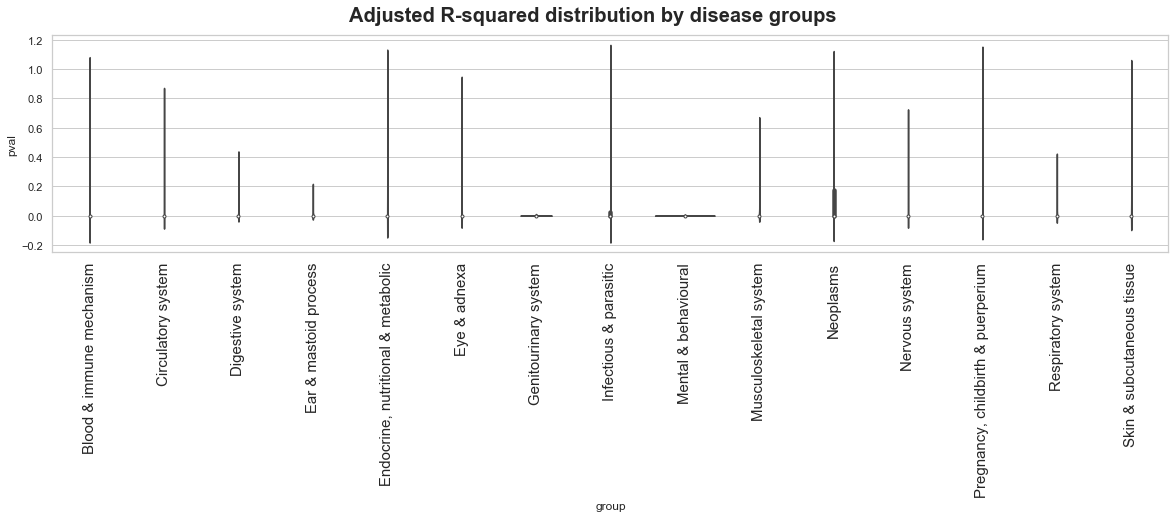

In [499]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(20, 4))
ax = sns.violinplot(x="group", y="pval", data=table_poi0)
f.suptitle('Adjusted R-squared distribution by disease groups', fontsize=20, fontweight='bold')
plt.xticks(rotation='vertical',fontsize=15)
plt.show()

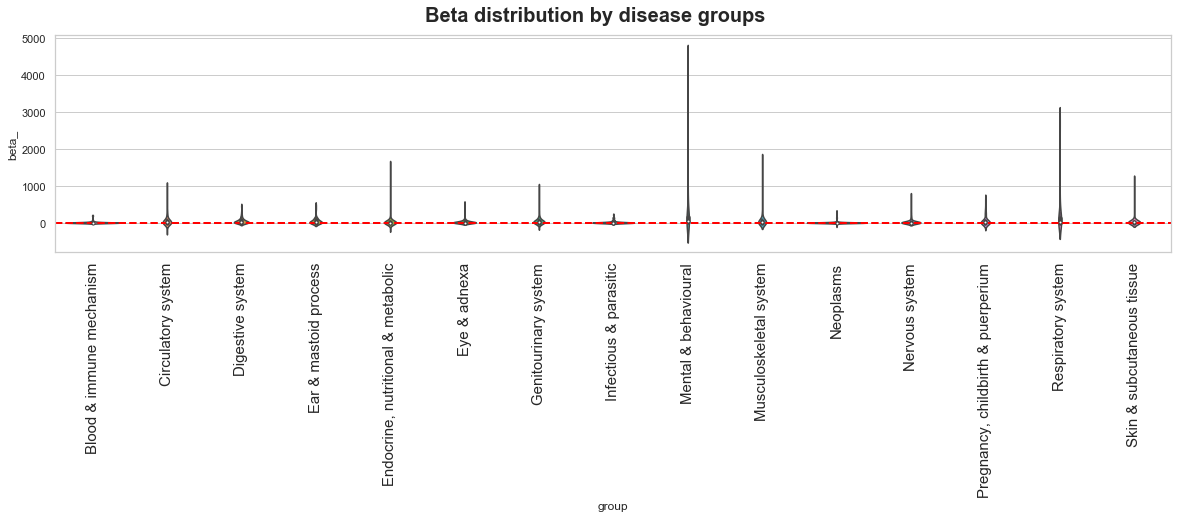

In [261]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(20, 4))
ax = sns.violinplot(x="group", y="beta_", data=table_rdd0)
f.suptitle('Beta distribution by disease groups', fontsize=20, fontweight='bold')
plt.axhline(-lr.intercept_/lr.coef_[0][0], color='red', linestyle='dashed', linewidth=2)
plt.xticks(rotation='vertical',fontsize=15)
plt.show()

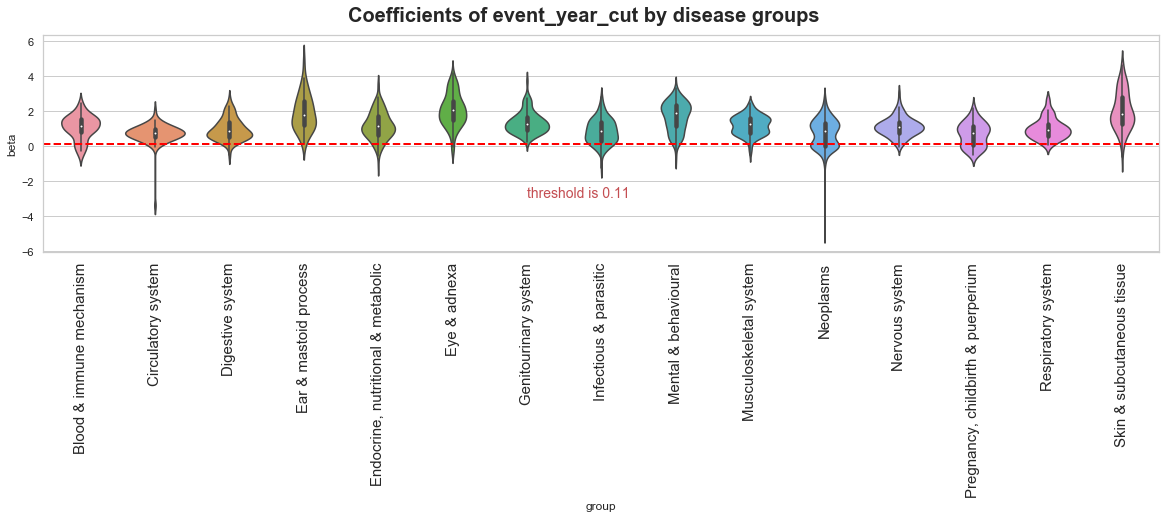

In [269]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(20, 4))
ax = sns.violinplot(x="group", y="beta", data=table_poi)
f.suptitle('Coefficients of event_year_cut by disease groups', fontsize=20, fontweight='bold')
plt.axhline(-lr.intercept_/lr.coef_[0][0], color='red', linestyle='dashed', linewidth=2)
plt.xticks(rotation='vertical',fontsize=15)
plt.text(6, -lr.intercept_/lr.coef_[0]-3, 'threshold is '+'{0:.2f}'.format((-lr.intercept_/lr.coef_[0])[0]),size=14,color='r')
plt.show()

In [503]:
a = table_poi0[table_poi0.group == 'Neoplasms']
a['header'] = a.endpoint.str[:2]
a['Neoplasm Subgroups'] = ['C3' if i == 'C3' else 'CD2' if i == 'CD' else 'Other' for i in a.header]

In [504]:
a

,group,endpoint,beta,pval,zscore,start,end,image,header,Neoplasm Subgroups
145,Neoplasms,C3_ACCESSORY_SINUS,-0.022675,9.072641e-01,-0.116490,1986,2011,Neoplasms-C3_ACCESSORY_SINUS.png,C3,C3
146,Neoplasms,C3_ADRENAL_GLAND,-0.086213,5.067173e-01,-0.663958,1986,2011,Neoplasms-C3_ADRENAL_GLAND.png,C3,C3
147,Neoplasms,C3_ANUS_ANALCANAL,-0.162429,3.156918e-01,-1.003350,1986,2011,Neoplasms-C3_ANUS_ANALCANAL.png,C3,C3
148,Neoplasms,C3_ASTROCYTOMA,0.618324,1.718870e-02,2.382646,1986,2011,Neoplasms-C3_ASTROCYTOMA.png,C3,C3
149,Neoplasms,C3_BASEOFTONGUE,-0.486085,3.040618e-02,-2.164759,1986,2011,Neoplasms-C3_BASEOFTONGUE.png,C3,C3
...,...,...,...,...,...,...,...,...,...,...
412,Neoplasms,CD2_MYELOID_LEUKAEMIA,1.221071,0.000000e+00,73.776968,1986,2011,Neoplasms-CD2_MYELOID_LEUKAEMIA.png,CD,CD2
413,Neoplasms,CD2_NONFOLLICULAR_LYMPHOMA,1.004221,0.000000e+00,96.245168,1986,2011,Neoplasms-CD2_NONFOLLICULAR_LYMPHOMA.png,CD,CD2
414,Neoplasms,CD2_NONHODGKIN_NAS,0.842432,0.000000e+00,47.619000,1986,2011,Neoplasms-CD2_NONHODGKIN_NAS.png,CD,CD2
415,Neoplasms,CD2_OTHER_LEUKAEMIA_SPECIFIED,0.676336,8.463183e-08,5.356964,1986,2011,Neoplasms-CD2_OTHER_LEUKAEMIA_SPECIFIED.png,CD,CD2


In [ ]:
a[a['Neoplasm Subgroups'] == 'CD2'].endpoint image

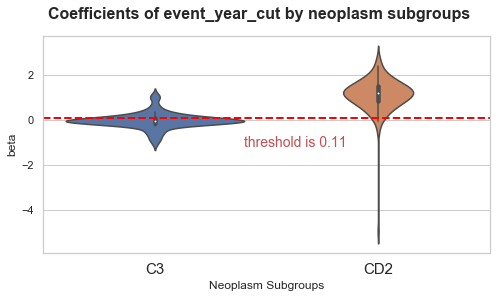

In [295]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(8, 4))
ax = sns.violinplot(x="Neoplasm Subgroups", y="beta", data=a)
f.suptitle('Coefficients of event_year_cut by neoplasm subgroups', fontsize=16, fontweight='bold')
plt.axhline(-lr.intercept_/lr.coef_[0][0], color='red', linestyle='dashed', linewidth=2)
plt.xticks(fontsize=15)
plt.text(.4, -lr.intercept_/lr.coef_[0]-1.3, 'threshold is '+'{0:.2f}'.format((-lr.intercept_/lr.coef_[0])[0]),size=14,color='r')
plt.show()

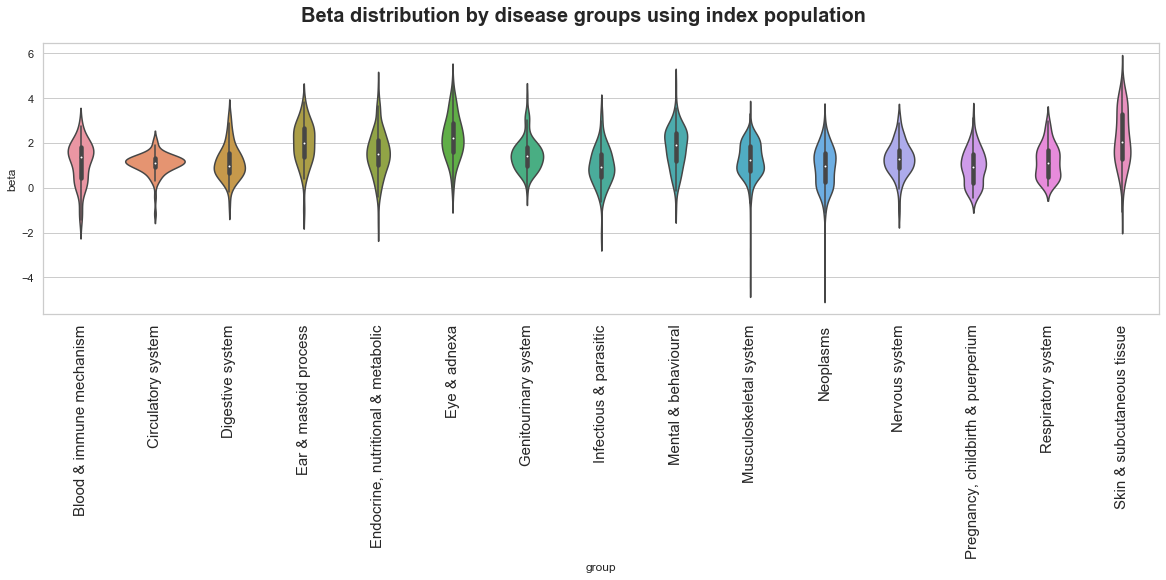

In [239]:
a = pd.read_csv('results.tsv',sep='\t')
a = a.merge(table[['endpoint','group']],on='endpoint')
a = a.sort_values(['group'])

sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(20, 5))
ax = sns.violinplot(x="group", y="beta", data=a)
f.suptitle('Beta distribution by disease groups using index population', fontsize=20, fontweight='bold')
plt.xticks(rotation='vertical',fontsize=15)
plt.show()

In [45]:
def getSamples(df,sample_size=200):
    endpoint_size = len(df)
    group_series = df.group.value_counts()
    img_list = []
    for i in group_series.keys():
        sample_size_sub = int(sample_size*group_series[i]/endpoint_size)
        img_list += random.sample(df[df.group == i].image.tolist(),sample_size_sub)
    while len(set(img_list)) < sample_size:
        img_list += random.sample(df.image.tolist(),sample_size - len(set(img_list)))
    img_list = list(set(img_list))
    return df[df.image.isin(img_list)].image.tolist()

In [26]:
def getPlots(start_num, end_num, n_col=5, img_name_list=img_list, img_dir='plots'):
    input_list = img_name_list[start_num:end_num]
    n_row = np.ceil((end_num - start_num)/n_col)
    plt.figure(figsize =(20,20/n_col*n_row))
#     [axi.set_axis_off() for axi in ax.ravel()]

    for i in tqdm.tqdm(range(len(input_list))):
        if i >= n_row*n_col:
            print('Out of range!')
            break
        # img_dir = '/Users/feiyiwang/Documents/FIMM_UH/disease_transmission/plots'
        image = Image.open(os.path.join(img_dir, input_list[i]))
        plt.subplot(n_row,n_col,i+1) # how to hide gridlines in subplots
#         plt.grid(None)
        plt.imshow(image,interpolation='none')

In [78]:
img_list = getSamples(table_rdd)
len(img_list)

200

In [88]:
np.array(img_list[40:80]).reshape(-1,5)

array([['Endocrine, nutritional & metabolic-E4_DMNASKETO.png',
        'Endocrine, nutritional & metabolic-E4_GOITRENAS.png',
        'Endocrine, nutritional & metabolic-E4_HYPERCHOL.png',
        'Endocrine, nutritional & metabolic-E4_LIPODYST.png',
        'Endocrine, nutritional & metabolic-E4_MINERAL_MET.png'],
       ['Endocrine, nutritional & metabolic-E4_OBESITYNAS.png',
        'Endocrine, nutritional & metabolic-E4_PORPHYNAS.png',
        'Endocrine, nutritional & metabolic-E4_PREPUB.png',
        'Endocrine, nutritional & metabolic-E4_SPHIGLOLIPNAS.png',
        'Endocrine, nutritional & metabolic-E4_THYMUSDISNAS.png'],
       ['Endocrine, nutritional & metabolic-E4_THYROIDITDRUG.png',
        'Endocrine, nutritional & metabolic-E4_THYTOXGOITDIF.png',
        'Eye & adnexa-H7_ASTIGMATISM.png',
        'Eye & adnexa-H7_BINODISTOTH.png',
        'Eye & adnexa-H7_BLINDANDVISIMPAIRMENT.png'],
       ['Eye & adnexa-H7_CONJUNCTIVITISACUNONATOPIC.png',
        'Eye & adnexa-H7_CORNE

100%|██████████| 60/60 [00:02<00:00, 22.89it/s]


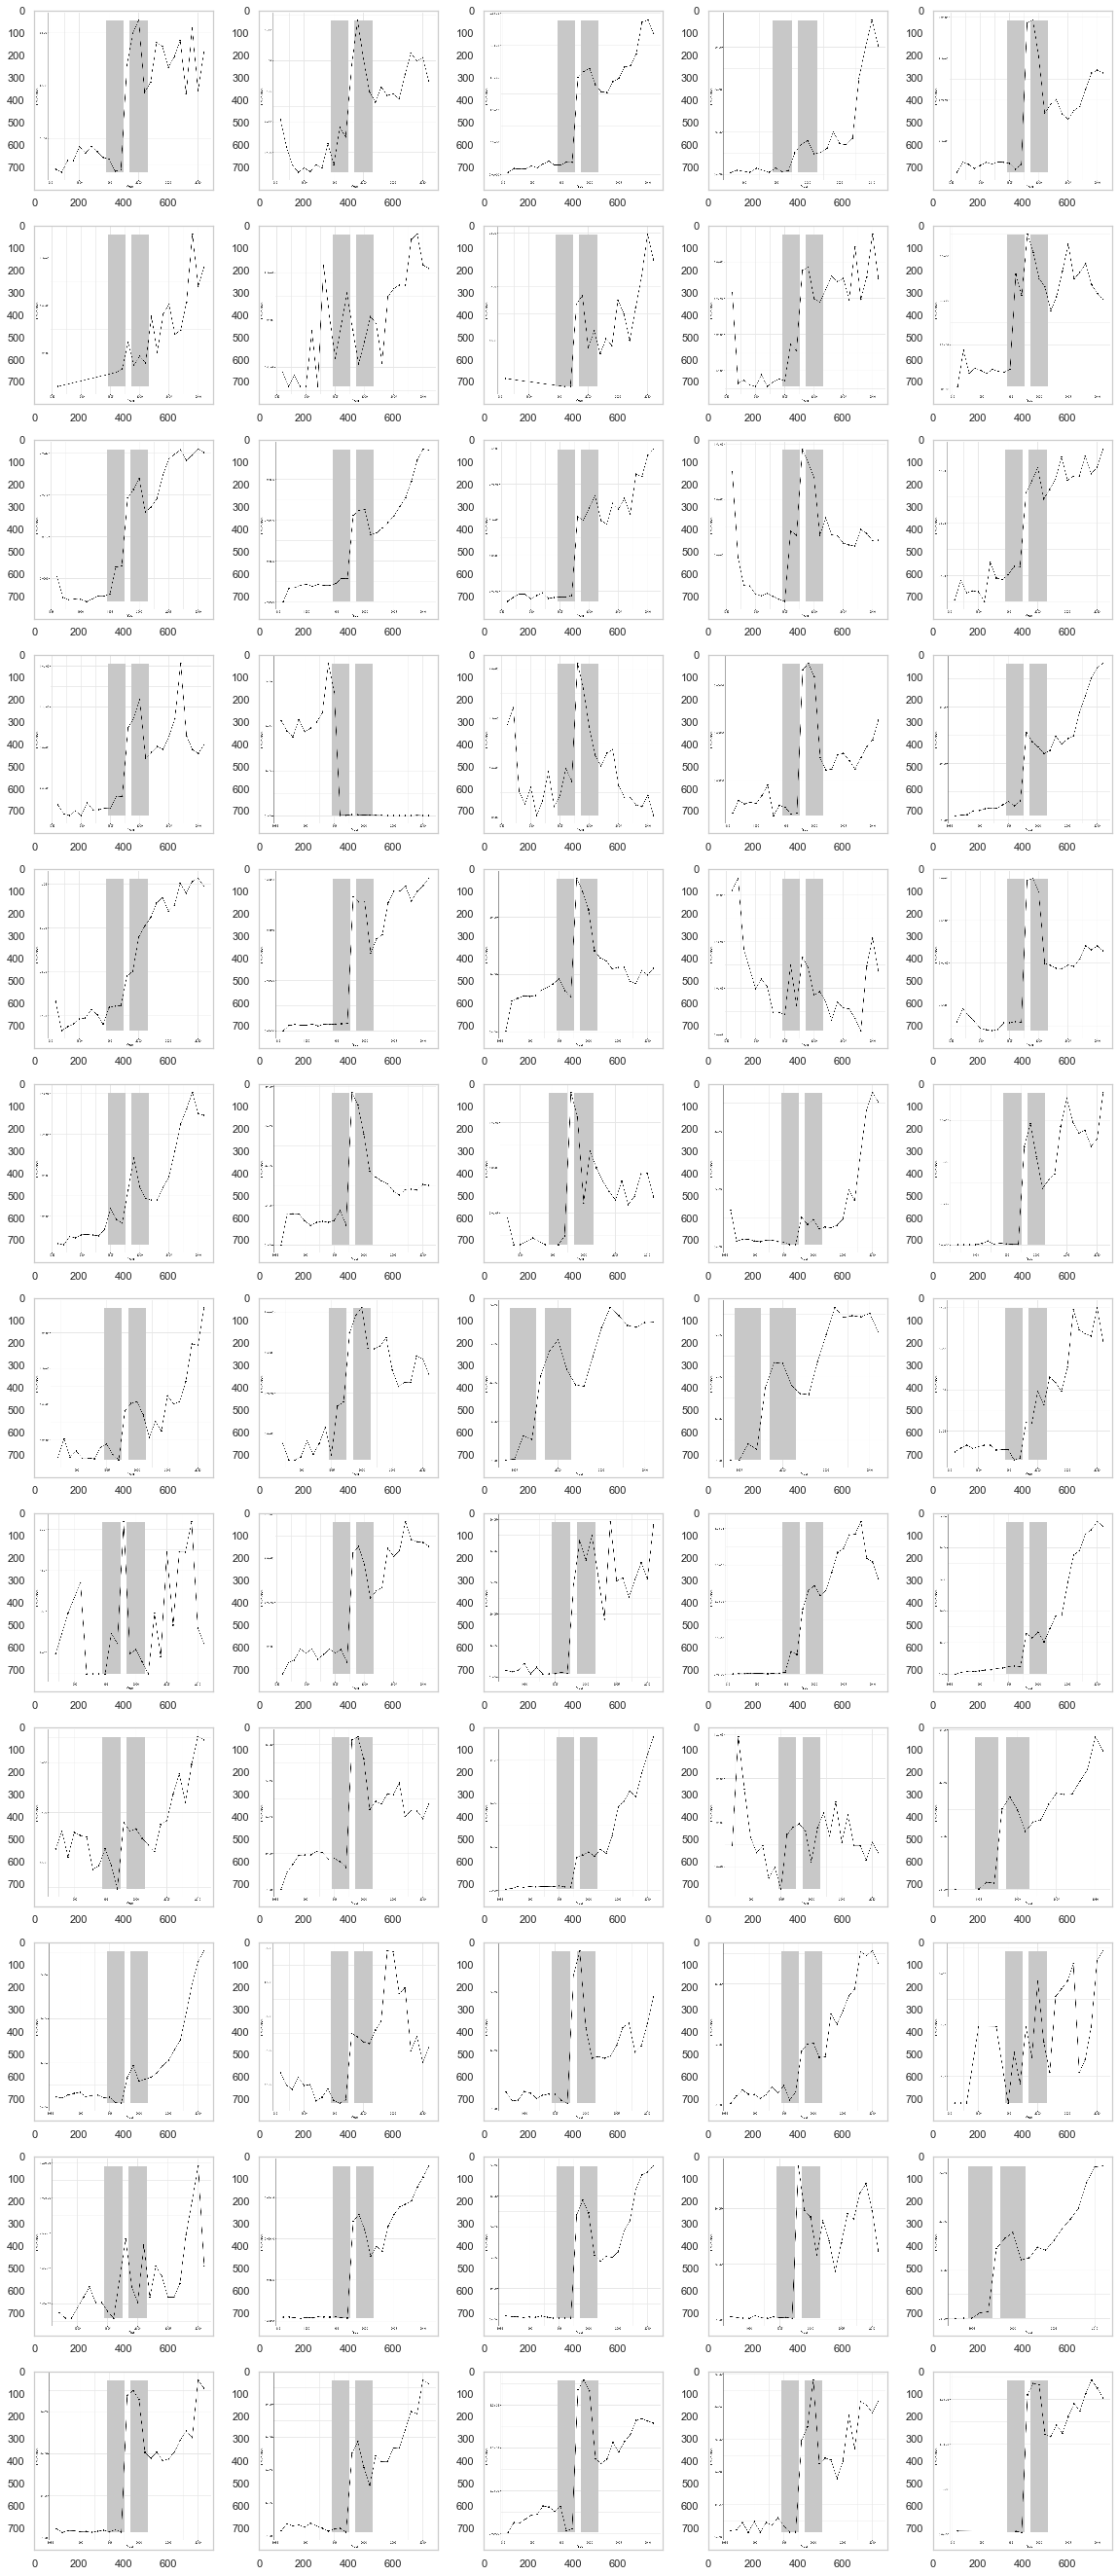

In [527]:
# getPlots(160, 200)
getPlots(0, 60, img_name_list=img_list)  ## if img_list gets renewed

In [95]:
outcome = [
    1,1,1,1,1, 1,0,1,1,-1, 1,1,1,-1,1, 1,0,-1,1,1, 1,1,-1,-1,1, 1,1,1,1,1, 1,1,1,1,1, -1,1,1,1,1,
    1,1,1,-1,1, 1,1,1,1,-1, -1,1,1,1,1, 1,1,1,1,1, 1,1,1,1,1, 1,-1,1,1,1, 1,1,1,1,1, 1,1,1,1,0,
    1,-1,1,1,-1, 1,-1,-1,-1,1, 1,1,1,1,1, 1,1,1,1,1, 1,-1,1,-1,1, -1,1,1,-1,1, 1,0,1,1,-1, 1,-1,1,1,1,
    1,1,-1,1,0, 0,0,0,1,0, 0,0,-1,0,-1, 0,-1,0,1,1, 1,-1,1,-1,1, 1,1,1,1,1, 1,1,-1,1,1, 1,1,-1,1,0,
    1,1,0,1,1, 1,1,1,-1,-1, 1,1,1,0,-1, 1,1,-1,-1,1, 1,-1,-1,1,1, 1,1,1,1,1, 1,1,1,1,-1, 1,1,1,1,1
]
len(outcome)

200

In [99]:
pd.DataFrame({'image':img_list,'outcome':outcome}).to_csv('annotation.csv')

In [398]:
print('Total annotation',str(len(outcome)))
print('Number of y',str(sum(1 for i in outcome if i != -1)))
print('Number of 1s',str(sum(1 for i in outcome if i == 1)))
print('Number of 0s',str(sum(1 for i in outcome if i == 0)))

Total annotation 200
Number of y 163
Number of 1s 146
Number of 0s 17


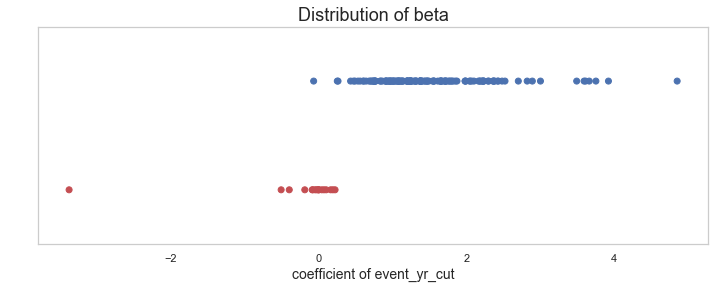

In [549]:
# pay attention to the dataframe here. which to use?

data = np.array([outcome,round(table_poi[table_poi.image.isin(img_list)].beta,2).tolist()]).T
data_selected = data[data[:,0] != -1]
y = data_selected[:,0]
x = data_selected[:,1].reshape(-1,1)

plt.figure(figsize=(12, 4))
colors = ['b' if i == 1 else 'r' for i in y]
plt.scatter(x,y,c=colors)
plt.grid(b=None)
plt.yticks([-.5,1.5],color='white')
plt.xlabel('coefficient of event_yr_cut',size=14)
plt.title('Distribution of beta',size=18)
# plt.text(3.4, 0, 'Labeled as 1',size=16,color='b')
# plt.text(3.4, -.2, 'Labeled as 0',size=16,color='r')
plt.show()

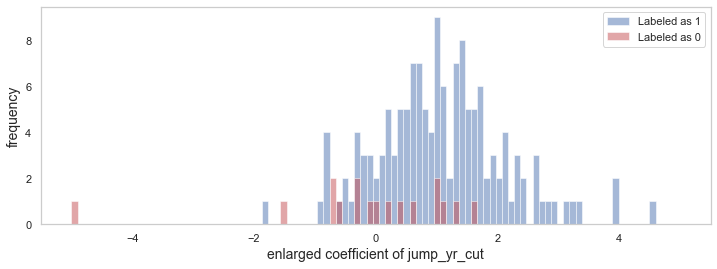

In [492]:
plt.figure(figsize=(12, 4))
data = pd.DataFrame([outcome,round(table_poi[table_poi.image.isin(img_list)].beta3,2).tolist()]).T.dropna()
data = data.to_numpy()
# data = np.array([outcome,round(table_rdd[table_rdd.image.isin(img_list)].beta1_,2).tolist()]).T
a = data[data[:,0] == 1]
a = a[:,1].reshape(-1,1)
b = data[data[:,0] == 0]
b = b[:,1].reshape(-1,1)

bins = np.linspace(-5, 5, 100)
plt.grid(b=None)
plt.hist(a, bins, alpha=0.5, label='Labeled as 1', color='b')
plt.hist(b, bins, alpha=0.5, label='Labeled as 0', color='r')
plt.legend(loc='upper right')
plt.xlabel('enlarged coefficient of jump_yr_cut',size=14)
plt.ylabel('frequency',size=14)
plt.show()

In [435]:
def model(df,col,title):

    data = np.array([outcome,round(df[df.image.isin(img_list)][col],2).tolist()]).T
    data_selected = data[data[:,0] != -1]
    y = data_selected[:,0]
    x = data_selected[:,1].reshape(-1,1)

    lr = LogisticRegression().fit(x, y)
    print('accuracy: ',str(lr.score(x,y)))
    print('coef: ',str(lr.coef_),'  intercept: ',str(lr.intercept_))

#     print('confusion matrix:')
#     print(metrics.confusion_matrix(y, lr.predict(x)))
    fpr, tpr, thresholds = metrics.roc_curve(y, lr.predict(x))
    print('auc: ',str(metrics.auc(fpr, tpr)))
    print('R-squared: ',str(metrics.r2_score(y, lr.predict(x))))

    data_for_plot = np.array([y,x.T[0]]).T
    data_for_plot = data_for_plot[(data_for_plot[:,1] < 50)&(data_for_plot[:,1] > -15)]

    plt.figure(figsize=(15, 4))
    colors = ['b' if i == 1 else 'r' for i in data_for_plot.T[0]]
    plt.scatter(data_for_plot.T[1],data_for_plot.T[0],c=colors)
    plt.axvline(-lr.intercept_/lr.coef_[0], color='grey', linestyle='dashed', linewidth=2)
    plt.grid(b=None)
    plt.yticks([-.5,1.5],color='white')
    plt.xlabel('enlarged coefficient of jump_yr_cut',size=14)
    plt.title(title+' - LR',size=18)
    plt.text(-lr.intercept_/lr.coef_[0]+0.5, .5, 'threshold is '+'{0:.2f}'.format((-lr.intercept_/lr.coef_[0])[0]),size=14,color='grey')
    plt.text(40, 0, 'Labeled as 1',size=16,color='b')
    plt.text(40, -.2, 'Labeled as 0',size=16,color='r')
    plt.show()
    
    return x,y,lr

accuracy:  0.9754601226993865
coef:  [[3.55918955]]   intercept:  [-0.40214332]
auc:  0.9083400483481063
R-squared:  0.7373086220789686


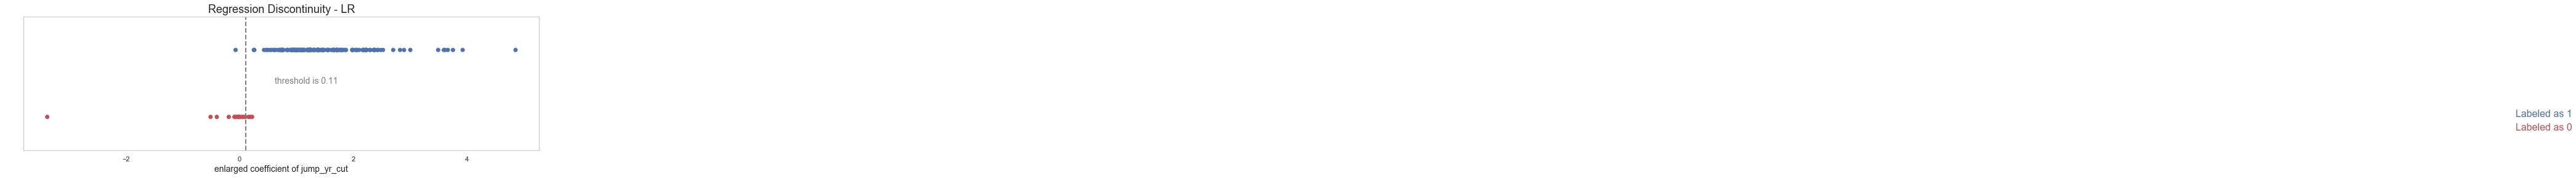

In [445]:
x,y,lr = model(table_poi0,'beta','Regression Discontinuity')

accuracy:  0.8834355828220859
coef:  [[0.00685315]]   intercept:  [1.60992989]
confusion matrix:
[[  1  16]
 [  3 143]]
auc:  0.5191377921031427
R-squared:  -0.24778404512489915


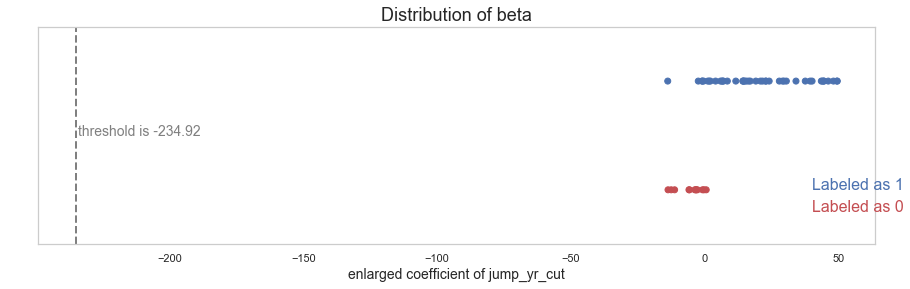

In [176]:
x,y,lr = model(table_rdd,'beta1_')

accuracy:  0.9877300613496932
coef:  [[1.08203433]]   intercept:  [-1.42084276]
auc:  0.967163577759871
R-squared:  0.8686543110394843


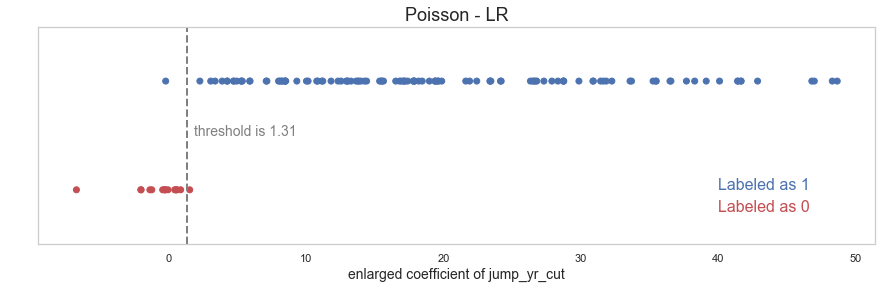

In [586]:
x,y,lr = model(table_poi0,'zscore','Poisson')

In [589]:
lr_probs

array([9.99999928e-01, 9.99928100e-01, 1.00000000e+00, 9.87348166e-01,
       9.99999997e-01, 1.57025168e-01, 5.09377312e-02, 9.40845713e-01,
       9.99996847e-01, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 9.99999988e-01, 1.77677038e-23, 1.00000000e+00,
       1.00000000e+00, 9.99999983e-01, 1.00000000e+00, 1.00000000e+00,
       9.86510981e-01, 1.00000000e+00, 9.59990373e-01, 9.99999972e-01,
       1.00000000e+00, 9.01570048e-01, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 9.99999947e-01, 9.99999998e-01,
       1.00000000e+00, 1.00000000e+00, 9.75806484e-01, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 9.99419963e-01,
       9.99999997e-01, 9.99966287e-01, 1.00000000e+00, 1.00000000e+00,
       9.99557376e-01, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 9.98156165e-01, 9.99998896e-01, 1.00000000e+00,
       1.00000000e+00, 9.93057729e-01, 1.00000000e+00, 9.99999982e-01,
      

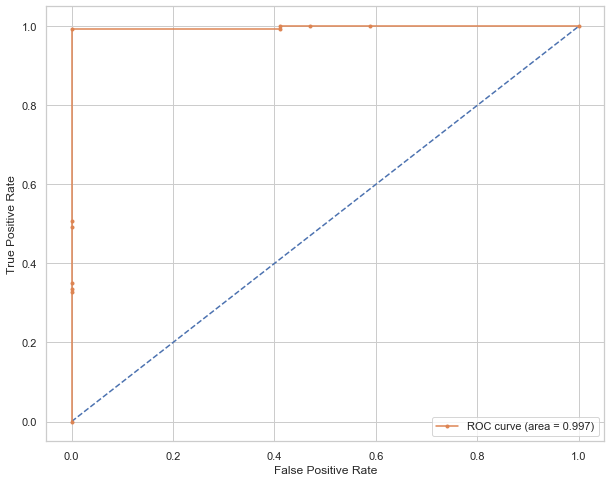

In [595]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y))]
# predict probabilities
lr_probs = lr.predict_proba(x)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = metrics.roc_auc_score(y, ns_probs)
lr_auc = metrics.roc_auc_score(y, lr_probs)
# calculate roc curves
ns_fpr, ns_tpr, _ = metrics.roc_curve(y, ns_probs)
lr_fpr, lr_tpr, _ = metrics.roc_curve(y, lr_probs)
# plot the roc curve for the model
plt.figure(figsize=(10, 8))
plt.plot(ns_fpr, ns_tpr, linestyle='--')
plt.plot(lr_fpr, lr_tpr, marker='.', label='ROC curve (area = %0.3f)' % lr_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

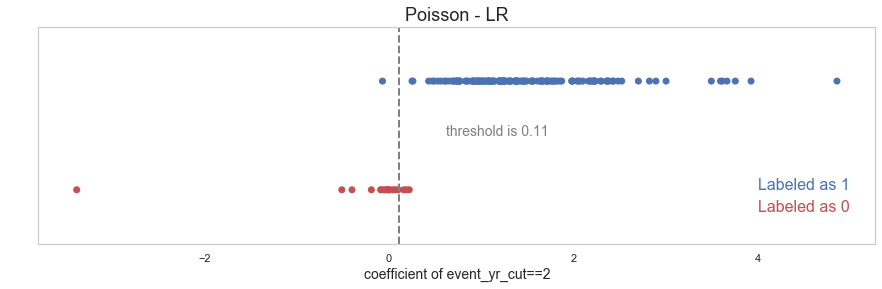

In [396]:
plt.figure(figsize=(15, 4))
colors = ['b' if i == 1 else 'r' for i in y]
plt.scatter(x,y,c=colors)
plt.axvline(-lr.intercept_/lr.coef_[0], color='grey', linestyle='dashed', linewidth=2)
plt.grid(b=None)
plt.yticks([-.5,1.5],color='white')
plt.xlabel('coefficient of event_yr_cut==2',size=14)
plt.title('Poisson - LR',size=18)
plt.text(-lr.intercept_/lr.coef_[0]+0.5, .5, 'threshold is '+'{0:.2f}'.format((-lr.intercept_/lr.coef_[0])[0]),size=14,color='grey')
plt.text(4, 0, 'Labeled as 1',size=16,color='b')
plt.text(4, -.2, 'Labeled as 0',size=16,color='r')
plt.show()

accuracy:  0.9141104294478528
coef:  [[-3.33296481]]   intercept:  [2.31323211]
confusion matrix:
[[  4  13]
 [  1 145]]
auc:  0.6142224012892828
R-squared:  0.08058017727639011


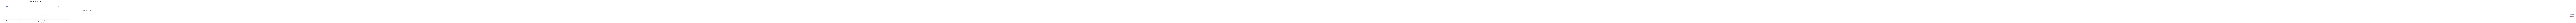

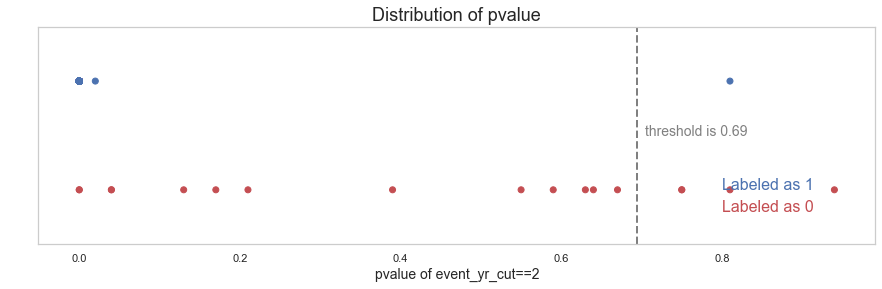

In [364]:
x,y,lr = model(table_poi0,'pval')
plt.figure(figsize=(15, 4))
colors = ['b' if i == 1 else 'r' for i in y]
plt.scatter(x,y,c=colors)
plt.axvline(-lr.intercept_/lr.coef_[0], color='grey', linestyle='dashed', linewidth=2)
plt.grid(b=None)
plt.yticks([-.5,1.5],color='white')
plt.xlabel('pvalue of event_yr_cut==2',size=14)
plt.title('Distribution of pvalue',size=18)
plt.text(-lr.intercept_/lr.coef_[0]+0.01, .5, 'threshold is '+'{0:.2f}'.format((-lr.intercept_/lr.coef_[0])[0]),size=14,color='grey')
plt.text(.8, 0, 'Labeled as 1',size=16,color='b')
plt.text(.8, -.2, 'Labeled as 0',size=16,color='r')
plt.show()

accuracy:  0.89375
coef:  [[0.92444022]]   intercept:  [1.50459941]
auc:  0.5259152612093789
R-squared:  -0.11888111888111896


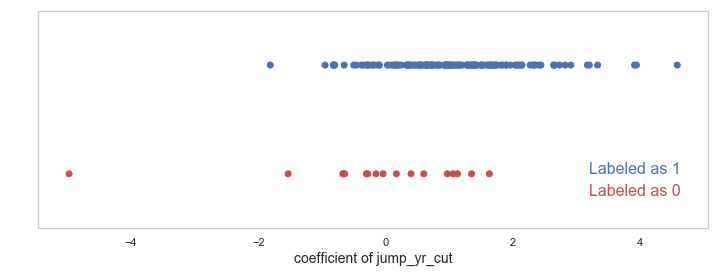

In [454]:
data = pd.DataFrame([outcome,
                 round(table_poi[table_poi.image.isin(img_list)].beta3,2).tolist(),
                 round(table_poi[table_poi.image.isin(img_list)].pval3,2).tolist()]).T.dropna()
data = data.to_numpy()
data_selected = data[data[:,0] != -1]
y = data_selected[:,0]
x = data_selected[:,1].reshape(-1,1)

lr = LogisticRegression().fit(x, y)
print('accuracy: ',str(lr.score(x,y)))
print('coef: ',str(lr.coef_),'  intercept: ',str(lr.intercept_))

#     print('confusion matrix:')
#     print(metrics.confusion_matrix(y, lr.predict(x)))
fpr, tpr, thresholds = metrics.roc_curve(y, lr.predict(x))
print('auc: ',str(metrics.auc(fpr, tpr)))
print('R-squared: ',str(metrics.r2_score(y, lr.predict(x))))

data_for_plot = np.array([y,x.T[0]]).T
data_for_plot = data_for_plot[(data_for_plot[:,1] < 50)&(data_for_plot[:,1] > -15)]

plt.figure(figsize=(12, 4))
colors = ['b' if i == 1 else 'r' for i in data_for_plot.T[0]]
plt.scatter(data_for_plot.T[1],data_for_plot.T[0],c=colors)
# plt.axvline(-lr.intercept_/lr.coef_[0], color='grey', linestyle='dashed', linewidth=2)
plt.grid(b=None)
plt.yticks([-.5,1.5],color='white')
plt.xlabel('coefficient of jump_yr_cut',size=14)
# plt.title(title+' - LR',size=18)
# plt.text(-lr.intercept_/lr.coef_[0]+0.5, .5, 'threshold is '+'{0:.2f}'.format((-lr.intercept_/lr.coef_[0])[0]),size=14,color='grey')
plt.text(3.2, 0, 'Labeled as 1',size=16,color='b')
plt.text(3.2, -.2, 'Labeled as 0',size=16,color='r')
plt.show()

In [106]:
lr.predict_proba(x)

array([[8.90422296e-02, 9.10957770e-01],
       [1.31889337e-01, 8.68110663e-01],
       [1.22592928e-02, 9.87740707e-01],
       [2.81237756e-01, 7.18762244e-01],
       [4.68786310e-02, 9.53121369e-01],
       [2.75153663e-01, 7.24846337e-01],
       [2.90862819e-01, 7.09137181e-01],
       [2.52920628e-01, 7.47079372e-01],
       [3.76475886e-02, 9.62352411e-01],
       [0.00000000e+00, 1.00000000e+00],
       [2.43118640e-07, 9.99999757e-01],
       [1.90515231e-02, 9.80948477e-01],
       [0.00000000e+00, 1.00000000e+00],
       [3.95205342e-02, 9.60479466e-01],
       [1.00000000e+00, 2.24488716e-26],
       [2.95319325e-14, 1.00000000e+00],
       [4.50017840e-03, 9.95499822e-01],
       [2.81364332e-03, 9.97186357e-01],
       [2.22044605e-16, 1.00000000e+00],
       [1.09038334e-10, 1.00000000e+00],
       [2.21871318e-01, 7.78128682e-01],
       [1.41866616e-07, 9.99999858e-01],
       [2.06575304e-01, 7.93424696e-01],
       [5.27146968e-01, 4.72853032e-01],
       [0.000000

In [849]:
np.array([format(i, '.2f') for i in lr.decision_function(x)]).reshape(-1,5) # Predict confidence scores for samples.
# The confidence score for a sample is the signed distance of that sample to the hyperplane.

array([['28.22', '4.03', '0.45', '0.87', '1.40'],
       ['2.14', '14.64', '13.31', '27.99', '0.22'],
       ['1.45', '4.58', '0.68', '122.73', '5.38'],
       ['31.39', '0.12', '5.60', '20.55', '1.77'],
       ['2.08', '42.16', '25.85', '2.18', '-0.71'],
       ['1.54', '3.48', '0.57', '8.82', '211.77'],
       ['21.06', '-0.58', '9.93', '8.85', '11.42'],
       ['1.21', '0.62', '15.87', '1.03', '3.83'],
       ['1.44', '21.94', '0.66', '5.66', '2.49'],
       ['98.80', '1.23', '88.35', '20.97', '17.87'],
       ['0.20', '1.78', '6.91', '12.87', '60.30'],
       ['26.51', '5.95', '19.69', '6.82', '5.27'],
       ['8.23', '120.12', '2.08', '11.87', '48.51'],
       ['1.23', '0.55', '-0.69', '0.48', '3.20'],
       ['1.64', '30.02', '0.84', '149.61', '59.66'],
       ['6.39', '3.19', '0.08', '6.06', '109.61'],
       ['39.91', '702.85', '22.88', '265.49', '137.82'],
       ['-4.76', '37.48', '10.86', '2.69', '2.91'],
       ['5.58', '1.14', '2.19', '1.39', '306.23'],
       ['1.00', '1.

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [30]:
output = pd.DataFrame([outcome,
                   round(table_rdd[table_rdd.image.isin(img_list)].beta1_,2).tolist(), img_list
                  ])
output = output.T
output.columns = ['y', 'enlarged_beta','image']
output = output[output.y != -1]
output = output[['enlarged_beta','image']]
output['yhat'] = lr.predict(x)
output['y'] = y

In [31]:
output[(output.y == 0)&(output.yhat == 0)]

,enlarged_beta,image,yhat,y
138,-845.68,Neoplasms-CD2_BENIGN_LEIOMYOMA_UTERI.png,0.0,0.0


In [32]:
output[(output.y == 0)&(output.yhat == 0)].image.tolist()

['Neoplasms-CD2_BENIGN_LEIOMYOMA_UTERI.png']

In [33]:
errs = output[output.y != output.yhat]
errs

,enlarged_beta,image,yhat,y
2,-1.87,Blood & immune mechanism-D3_COMBIMMUDEFNAS.png,1.0,0.0
4,-77.32,Blood & immune mechanism-D3_IMMUDEFANTIBODYNAS...,1.0,0.0
5,-3.19,Blood & immune mechanism-D3_POLYCLOHYPERGAMMA.png,1.0,0.0
31,-713.17,Ear & mastoid process-WET_AMD.png,0.0,1.0
43,2.56,"Endocrine, nutritional & metabolic-E4_MINERAL_...",1.0,0.0
78,-128.07,Infectious & parasitic-AB1_BACT_BIR_OTHER_INF_...,1.0,0.0
80,4.1,Infectious & parasitic-AB1_DIBTHERIA.png,1.0,0.0
84,-1.76,Infectious & parasitic-AB1_MYCETOMA.png,1.0,0.0
93,-47.81,Infectious & parasitic-AB1_VIRAN_CNS_INFECTION...,1.0,0.0
94,-1168.86,Mental & behavioural-F5_ADHD.png,0.0,1.0


In [918]:
print('annotation: ',str(np.array(errs.y.tolist())))
print('prediction: ',str(np.array(errs.yhat.tolist())))

annotation:  [0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
prediction:  [1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


100%|██████████| 18/18 [00:04<00:00,  3.73it/s]


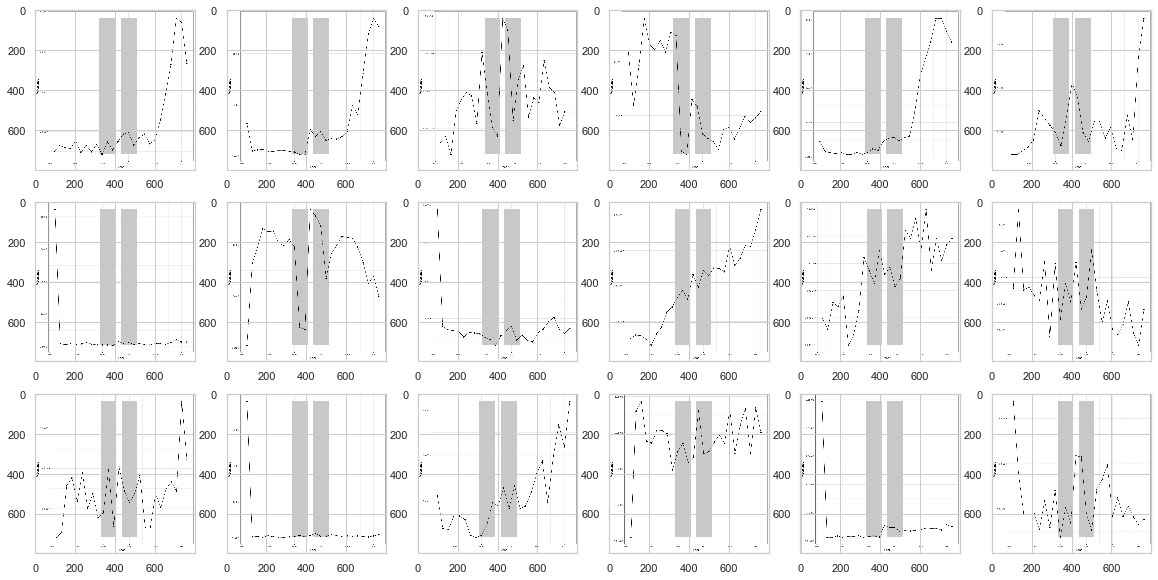

In [923]:
getPlots(0,len(errs),6,img_name_list=errs.image.tolist())

In [150]:
# pay attention to the dataframe here. which to use?

data = np.array([outcome,
                 round(table_rdd[table_rdd.image.isin(img_list)].beta2_,2).tolist(),
#                  round(table_rdd0[table_rdd0.image.isin(img_list)].rsquared,2).tolist(),
                 round(table_rdd[table_rdd.image.isin(img_list)].pval2,2).tolist(),
                ]).T
data_selected = data[data[:,0] != -1]
y = data_selected[:,0]
x = data_selected[:,1:]#.reshape(-1,1)
lr = LogisticRegression().fit(x, y)
print('score: ',str(lr.score(x,y)))
print('coef: ',str(lr.coef_),'  intercept: ',str(lr.intercept_))
print('confusion matrix:')
print(metrics.confusion_matrix(y, lr.predict(x)))
fpr, tpr, thresholds = metrics.roc_curve(y, lr.predict(x))
print('auc: ',str(metrics.auc(fpr, tpr)))
print('R-squared: ',str(metrics.r2_score(y, lr.predict(x))))

score:  0.8957055214723927
coef:  [[ 0.03476457 -0.20503705]]   intercept:  [1.09527835]
confusion matrix:
[[  4  13]
 [  4 142]]
auc:  0.6039484286865431
R-squared:  -0.11643835616438336


score:  0.8957055214723927
coef:  [[ 0.30312361 -0.71137375]]   intercept:  [1.18932797]
confusion matrix:
[[  4  13]
 [  4 142]]
auc:  0.6039484286865431
R-squared:  -0.11643835616438336


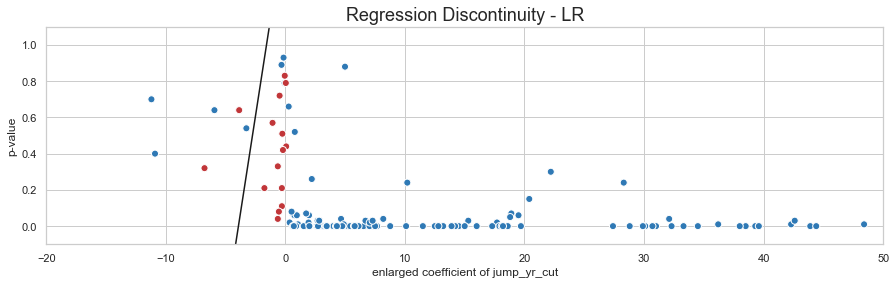

In [246]:
# pay attention to the dataframe here. which to use?

data = np.array([outcome,
                 round(table_rdd0[table_rdd0.image.isin(img_list)].beta_,2).tolist(),
#                  round(table_rdd0[table_rdd0.image.isin(img_list)].rsquared,2).tolist(),
                 round(table_rdd0[table_rdd0.image.isin(img_list)].pval,2).tolist(),
                ]).T
data_selected = data[data[:,0] != -1]
y = data_selected[:,0]
x = data_selected[:,1:]#.reshape(-1,1)
clf = LogisticRegression().fit(x, y)
print('score: ',str(clf.score(x,y)))
print('coef: ',str(clf.coef_),'  intercept: ',str(clf.intercept_))
print('confusion matrix:')
print(metrics.confusion_matrix(y, clf.predict(x)))
fpr, tpr, thresholds = metrics.roc_curve(y, clf.predict(x))
print('auc: ',str(metrics.auc(fpr, tpr)))
print('R-squared: ',str(metrics.r2_score(y, clf.predict(x))))

x_min, x_max, y_min, y_max = -20, 50, -.1, 1.1
xx, yy = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

f, ax = plt.subplots(figsize=(15, 4))
ax.contour(xx, yy, z, colors='k', linestyles='-',levels=[.0])
ax.scatter(x[:,0], x[:, 1], c=y, s=50, cmap="RdBu", vmin=-.2, vmax=1.2, edgecolor="white", linewidth=1)
ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max), xlabel="enlarged coefficient of jump_yr_cut", ylabel="p-value")
plt.title('Regression Discontinuity - LR', size=18)
plt.show()

accuracy:  0.901840490797546
coef:  [[ 0.01116858 -0.05544352]]   intercept:  [0.99239913]
auc:  0.5294117647058824
R-squared:  -0.050765511684125686


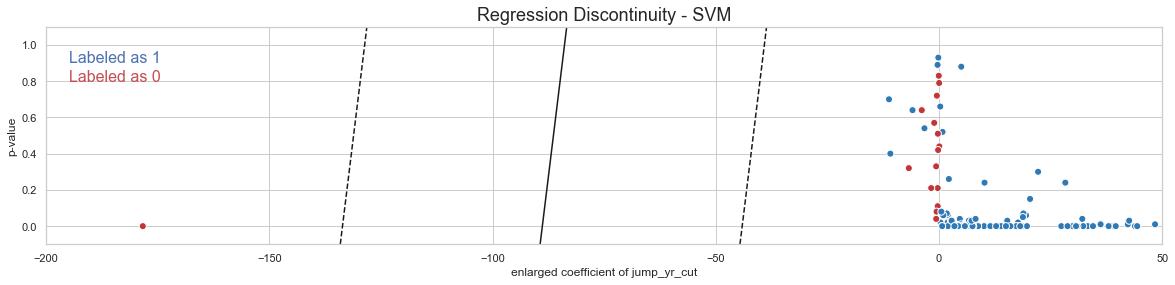

In [466]:
# pay attention to the dataframe here. which to use?

data = np.array([outcome,
                 round(table_rdd0[table_rdd0.image.isin(img_list)].beta_,2).tolist(),
#                  round(table_rdd0[table_rdd0.image.isin(img_list)].rsquared,2).tolist(),
                 round(table_rdd0[table_rdd0.image.isin(img_list)].pval,2).tolist(),
                ]).T
data_selected = data[data[:,0] != -1]
y = data_selected[:,0]
x = data_selected[:,1:]#.reshape(-1,1)
clf = SVC(kernel='linear').fit(x, y)
print('accuracy: ',str(clf.score(x,y)))
print('coef: ',str(clf.coef_),'  intercept: ',str(clf.intercept_))
# print('confusion matrix:')
# print(metrics.confusion_matrix(y, clf.predict(x)))
fpr, tpr, thresholds = metrics.roc_curve(y, clf.predict(x))
print('auc: ',str(metrics.auc(fpr, tpr)))
print('R-squared: ',str(metrics.r2_score(y, clf.predict(x))))

x_min, x_max, y_min, y_max = -200, 50, -.1, 1.1
xx, yy = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

f, ax = plt.subplots(figsize=(20, 4))
ax.contour(xx, yy, z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],levels=[-.5, 0, .5])
ax.scatter(x[:,0], x[:, 1], c=y, s=50, cmap="RdBu", vmin=-.2, vmax=1.2, edgecolor="white", linewidth=1)
ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max), xlabel="enlarged coefficient of jump_yr_cut", ylabel="p-value")
plt.title('Regression Discontinuity - SVM', size=18)
plt.text(x_min+5, y_max-.2, 'Labeled as 1',size=16,color='b')
plt.text(x_min+5, y_max-.3, 'Labeled as 0',size=16,color='r')
plt.show()

score:  0.9877300613496932
coef:  [[ 3.24837497 -1.5150804 ]]   intercept:  [0.01955212]
confusion matrix:
[[ 16   1]
 [  1 145]]
auc:  0.967163577759871
R-squared:  0.8686543110394843


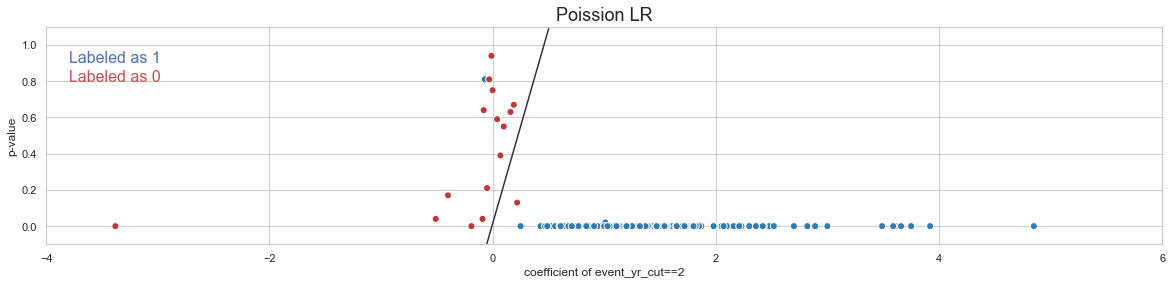

In [467]:
# pay attention to the dataframe here. which to use?

data = np.array([outcome,
                 round(table_poi0[table_poi0.image.isin(img_list)].beta,2).tolist(),
#                  round(table_rdd0[table_rdd0.image.isin(img_list)].rsquared,2).tolist(),
                 round(table_poi0[table_poi0.image.isin(img_list)].pval,2).tolist(),
                ]).T
data_selected = data[data[:,0] != -1]
y = data_selected[:,0]
x = data_selected[:,1:]#.reshape(-1,1)
lr = LogisticRegression().fit(x, y)
print('score: ',str(lr.score(x,y)))
print('coef: ',str(lr.coef_),'  intercept: ',str(lr.intercept_))
print('confusion matrix:')
print(metrics.confusion_matrix(y, lr.predict(x)))
fpr, tpr, thresholds = metrics.roc_curve(y, lr.predict(x))
print('auc: ',str(metrics.auc(fpr, tpr)))
print('R-squared: ',str(metrics.r2_score(y, lr.predict(x))))

x_min, x_max, y_min, y_max = -4, 6, -.1, 1.1
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = lr.predict_proba(grid)[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(20, 4))
ax.contour(xx, yy, probs, levels=[0.5], cmap="Greys", vmin=0, vmax=.6)
ax.scatter(x[:,0], x[:, 1], c=y, s=50, cmap="RdBu", vmin=-.2, vmax=1.2, edgecolor="white", linewidth=1)
ax.set(xlim=(-4, 6), ylim=(-.1, 1.1), xlabel="coefficient of event_yr_cut==2", ylabel="p-value")
plt.title('Poission LR', size=18)
plt.text(x_min+.2, y_max-.2, 'Labeled as 1',size=16,color='b')
plt.text(x_min+.2, y_max-.3, 'Labeled as 0',size=16,color='r')
plt.show()

accuracy:  0.9815950920245399
coef:  [[ 3.03030307 -0.86      ]]   intercept:  [-0.81408484]
auc:  0.9897260273972603
R-squared:  0.8029814665592264


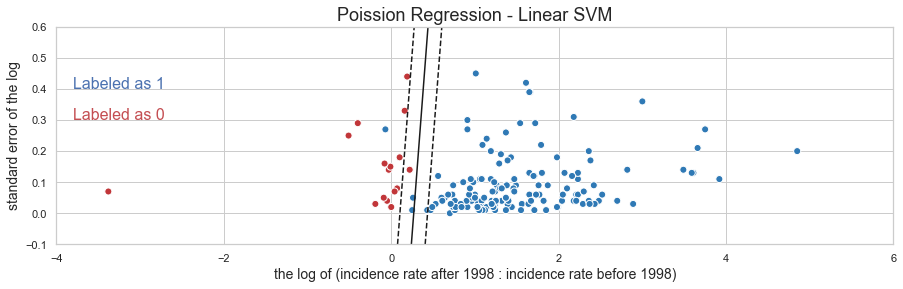

In [566]:
# pay attention to the dataframe here. which to use?

data = np.array([outcome,
                 round(table_poi[table_poi.image.isin(img_list)].beta,2).tolist(),
                 round(table_poi[table_poi.image.isin(img_list)].se,2).tolist(),
                ]).T
data_selected = data[data[:,0] != -1]
y = data_selected[:,0]
x = data_selected[:,1:]#.reshape(-1,1)
clf = SVC(kernel='linear',probability=True).fit(x, y)
print('accuracy: ',str(clf.score(x,y)))
print('coef: ',str(clf.coef_),'  intercept: ',str(clf.intercept_))
# print('confusion matrix:')
# print(metrics.confusion_matrix(y, clf.predict(x)))
fpr, tpr, thresholds = metrics.roc_curve(y, clf.predict(x))
print('auc: ',str(metrics.auc(fpr, tpr)))
print('R-squared: ',str(metrics.r2_score(y, clf.predict(x))))

x_min, x_max, y_min, y_max = -4, 6, -.1, .6
xx, yy = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

f, ax = plt.subplots(figsize=(15, 4))
ax.contour(xx, yy, z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],levels=[-.5, 0, .5])
ax.scatter(x[:,0], x[:, 1], c=y, s=50, cmap="RdBu", vmin=-.2, vmax=1.2, edgecolor="white", linewidth=1)
ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))
plt.title('Poission Regression - Linear SVM', size=18)
plt.text(x_min+.2, y_max-.2, 'Labeled as 1',size=16,color='b')
plt.text(x_min+.2, y_max-.3, 'Labeled as 0',size=16,color='r')
plt.xlabel('the log of (incidence rate after 1998 : incidence rate before 1998)',size=14)
plt.ylabel('standard error of the log',size=14)
plt.show()

In [564]:
n_classes = len(y)
y_score = clf.fit(x, y).decision_function(x)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr, tpr, thresholds = metrics.roc_curve(y, clf.predict(x))
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

IndexError: too many indices for array

accuracy:  0.9938650306748467
coef:  [[0.93201823 0.50819774]]   intercept:  [-1.39305146]
auc:  0.9965753424657534
R-squared:  0.9343271555197421


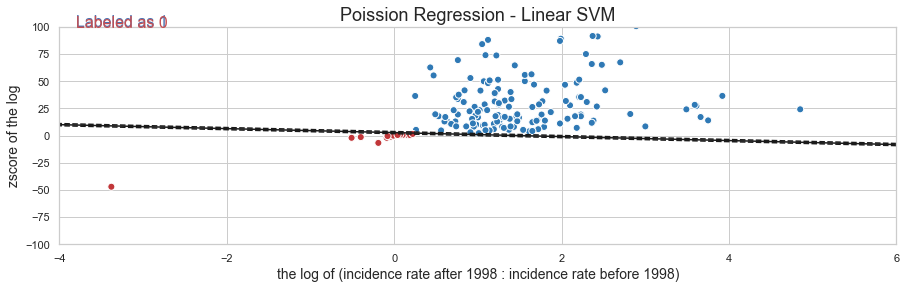

In [570]:
# pay attention to the dataframe here. which to use?

data = np.array([outcome,
                 round(table_poi[table_poi.image.isin(img_list)].beta,2).tolist(),
                 round(table_poi[table_poi.image.isin(img_list)].zscore,2).tolist(),
                ]).T
data_selected = data[data[:,0] != -1]
y = data_selected[:,0]
x = data_selected[:,1:]#.reshape(-1,1)
clf = SVC(kernel='linear',probability=True).fit(x, y)
print('accuracy: ',str(clf.score(x,y)))
print('coef: ',str(clf.coef_),'  intercept: ',str(clf.intercept_))
# print('confusion matrix:')
# print(metrics.confusion_matrix(y, clf.predict(x)))
fpr, tpr, thresholds = metrics.roc_curve(y, clf.predict(x))
print('auc: ',str(metrics.auc(fpr, tpr)))
print('R-squared: ',str(metrics.r2_score(y, clf.predict(x))))

x_min, x_max, y_min, y_max = -4, 6, -100.1, 100.1
xx, yy = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

f, ax = plt.subplots(figsize=(15, 4))
ax.contour(xx, yy, z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],levels=[-.5, 0, .5])
ax.scatter(x[:,0], x[:, 1], c=y, s=50, cmap="RdBu", vmin=-.2, vmax=1.2, edgecolor="white", linewidth=1)
ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))
plt.title('Poission Regression - Linear SVM', size=18)
plt.text(x_min+.2, y_max-.2, 'Labeled as 1',size=16,color='b')
plt.text(x_min+.2, y_max-.3, 'Labeled as 0',size=16,color='r')
plt.xlabel('the log of (incidence rate after 1998 : incidence rate before 1998)',size=14)
plt.ylabel('zscore of the log',size=14)
plt.show()

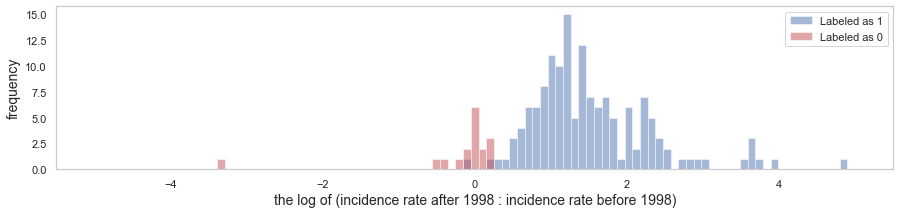

In [522]:
plt.figure(figsize=(15, 3))
data = pd.DataFrame([outcome,round(table_poi0[table_poi0.image.isin(img_list)].beta,2).tolist()]).T.dropna()
data = data.to_numpy()
# data = np.array([outcome,round(table_rdd[table_rdd.image.isin(img_list)].beta1_,2).tolist()]).T
a = data[data[:,0] == 1]
a = a[:,1].reshape(-1,1)
b = data[data[:,0] == 0]
b = b[:,1].reshape(-1,1)

bins = np.linspace(-5, 5, 100)
plt.grid(b=None)
plt.hist(a, bins, alpha=0.5, label='Labeled as 1', color='b')
plt.hist(b, bins, alpha=0.5, label='Labeled as 0', color='r')
plt.legend(loc='upper right')
plt.xlabel('the log of (incidence rate after 1998 : incidence rate before 1998)',size=14)
plt.ylabel('frequency',size=14)
plt.show()

In [502]:
test1

,group,endpoint,beta1,pval1,zscore1,beta2,pval2,zscore2,beta3,pval3,zscore3,start,end,avgn,image,header,Neoplasm Subgroups
1014,Neoplasms,C3_ACCESSORY_SINUS,0.022886,8.954317e-01,0.131434,0.120178,0.519517,0.644091,0.270156,0.308426,1.018530,1986,2011,19.807692,Neoplasms-C3_ACCESSORY_SINUS.png,C3,C3
1015,Neoplasms,C3_ADRENAL_GLAND,-0.404476,1.502133e-03,-3.174271,-0.393065,0.002403,-3.035346,-0.773854,0.000053,-4.042735,1986,2011,40.076923,Neoplasms-C3_ADRENAL_GLAND.png,C3,C3
1016,Neoplasms,C3_ANUS_ANALCANAL,-0.449711,2.927696e-03,-2.975229,-0.440291,0.005700,-2.764534,-0.513396,0.023781,-2.260649,1986,2011,27.730769,Neoplasms-C3_ANUS_ANALCANAL.png,C3,C3
1017,Neoplasms,C3_ASTROCYTOMA,0.773733,4.961643e-04,3.482819,0.834578,0.003874,2.888211,0.668234,0.037521,2.080048,1986,2011,16.653846,Neoplasms-C3_ASTROCYTOMA.png,C3,C3
1018,Neoplasms,C3_BASEOFTONGUE,-0.604846,1.750892e-03,-3.129525,-0.547408,0.006848,-2.704137,-0.737226,0.010645,-2.554132,1986,2011,16.615385,Neoplasms-C3_BASEOFTONGUE.png,C3,C3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,Neoplasms,C3_URETER,-0.223576,3.012048e-01,-1.033853,-0.238713,0.287866,-1.062815,-0.371331,0.247937,-1.155375,1986,2011,14.307692,Neoplasms-C3_URETER.png,C3,C3
1093,Neoplasms,C3_URINARY_TRACT_NAS,-1.075734,2.036128e-08,-5.608903,-1.025102,0.000003,-4.705732,-1.173686,0.000022,-4.241586,1986,2011,20.076923,Neoplasms-C3_URINARY_TRACT_NAS.png,C3,C3
1094,Neoplasms,C3_UTERUS_NAS,0.800196,2.849657e-03,2.983507,1.575660,0.000027,4.196578,1.751382,0.000020,4.267354,1986,2011,8.880000,Neoplasms-C3_UTERUS_NAS.png,C3,C3
1095,Neoplasms,C3_VAGINA,-0.071226,7.246940e-01,-0.352192,0.018656,0.931895,0.085461,-0.066338,0.832732,-0.211199,1986,2011,15.384615,Neoplasms-C3_VAGINA.png,C3,C3


In [511]:
test0 = a[a['Neoplasm Subgroups'] == 'CD2']
test1 = a[a['Neoplasm Subgroups'] == 'C3']
test2 = table_poi0[table_poi0.group == 'Skin & subcutaneous tissue']

In [512]:
x_test0 = test0[['beta','pval']].to_numpy()
x_test1 = test1[['beta','pval']].to_numpy()
x_test2 = test2[['beta','pval']].to_numpy()

In [513]:
y_hat0 = clf.predict(x_test0)
y_hat1 = clf.predict(x_test1)
y_hat2 = clf.predict(x_test2)

In [539]:
np.count_nonzero(y_hat1 == 0)

75

In [531]:
y_hat0

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.])

score:  0.9
coef:  [[ 1.18608388 -0.66435587]]   intercept:  [1.01288755]
confusion matrix:
[[  1  16]
 [  0 143]]
auc:  0.5294117647058824
R-squared:  -0.05306458247634738


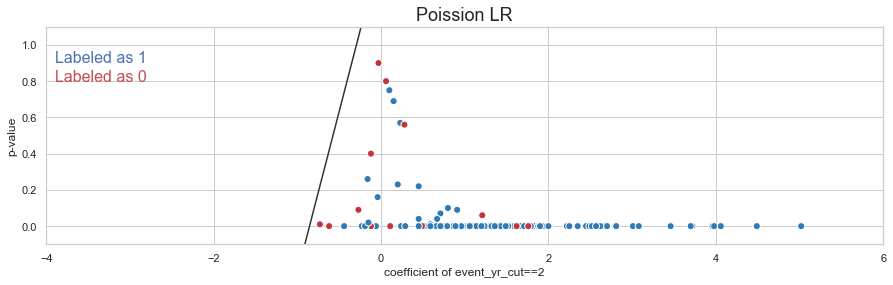

In [385]:
# pay attention to the dataframe here. which to use?

data = pd.DataFrame([outcome,
                 round(table_poi[table_poi.image.isin(img_list)].beta2,2).tolist(),
                 round(table_poi[table_poi.image.isin(img_list)].pval2,2).tolist()]).T.dropna()
data = data.to_numpy()
data_selected = data[data[:,0] != -1]
y = data_selected[:,0]
x = data_selected[:,1:]#.reshape(-1,1)
lr = LogisticRegression().fit(x, y)
print('score: ',str(lr.score(x,y)))
print('coef: ',str(lr.coef_),'  intercept: ',str(lr.intercept_))
print('confusion matrix:')
print(metrics.confusion_matrix(y, lr.predict(x)))
fpr, tpr, thresholds = metrics.roc_curve(y, lr.predict(x))
print('auc: ',str(metrics.auc(fpr, tpr)))
print('R-squared: ',str(metrics.r2_score(y, lr.predict(x))))

x_min, x_max, y_min, y_max = -4, 6, -.1, 1.1
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = lr.predict_proba(grid)[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(15, 4))
ax.contour(xx, yy, probs, levels=[0.5], cmap="Greys", vmin=0, vmax=.6)
ax.scatter(x[:,0], x[:, 1], c=y, s=50, cmap="RdBu", vmin=-.2, vmax=1.2, edgecolor="white", linewidth=1)
ax.set(xlim=(-4, 6), ylim=(-.1, 1.1), xlabel="coefficient of event_yr_cut==2", ylabel="p-value")
plt.title('Poission LR', size=18)
plt.text(x_min+.1, y_max-.2, 'Labeled as 1',size=16,color='b')
plt.text(x_min+.1, y_max-.3, 'Labeled as 0',size=16,color='r')
plt.show()

In [432]:
index = 'DRY_AMD'
df = table_rdd0
res = clf.predict([[df[df.endpoint == index].beta_.tolist()[0],df[df.endpoint == index].pval.tolist()[0]]])
print('Endpoint: ',index,'  Model: RL','  Label prediction: ',str(res[0]))
print('beta: ',str(df[df.endpoint == index].beta_.tolist()[0]),'  pval: ',str(df[df.endpoint == index].pval.tolist()[0]))

Endpoint:  DRY_AMD   Model: RL   Label prediction:  1.0
beta:  47.8   pval:  0.010735327


Endpoint:  DRY_AMD   Model: Poisson   Label prediction:  1.0
beta:  2.4107832330327796   pval:  0.0


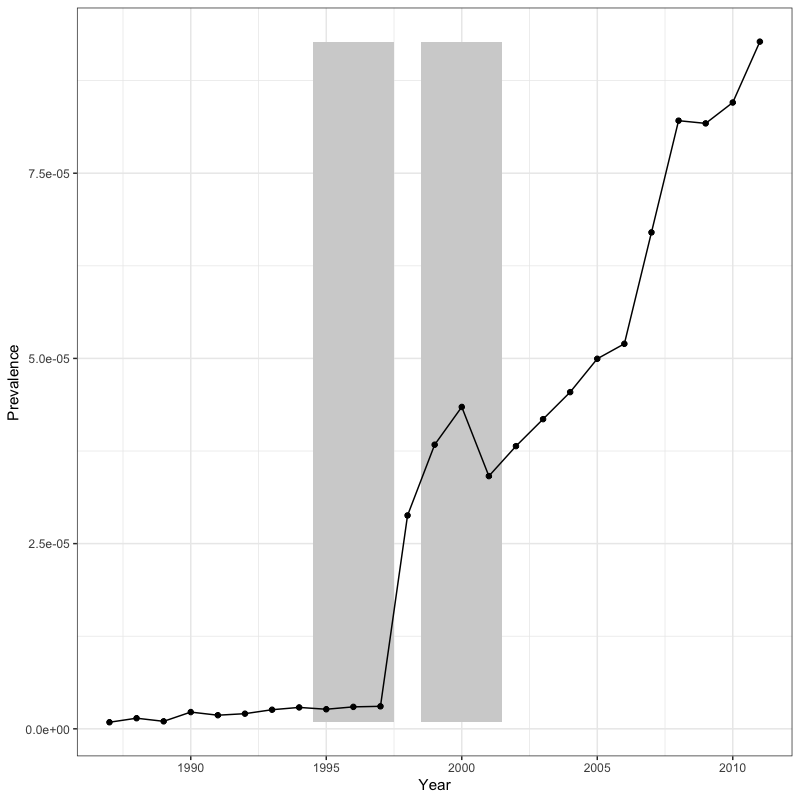

In [433]:
df = table_poi0
res = clf.predict([[df[df.endpoint == index].beta.tolist()[0],df[df.endpoint == index].pval.tolist()[0]]])
print('Endpoint: ',index,'  Model: Poisson','  Label prediction: ',str(res[0]))
print('beta: ',str(df[df.endpoint == index].beta.tolist()[0]),'  pval: ',str(df[df.endpoint == index].pval.tolist()[0]))
Image.open(os.path.join('plots', df[df.endpoint == index].image.tolist()[0]))

score:  0.9938650306748467
confusion matrix:
[[ 17   0]
 [  1 145]]
auc:  0.9965753424657534
R-squared:  0.9343271555197421


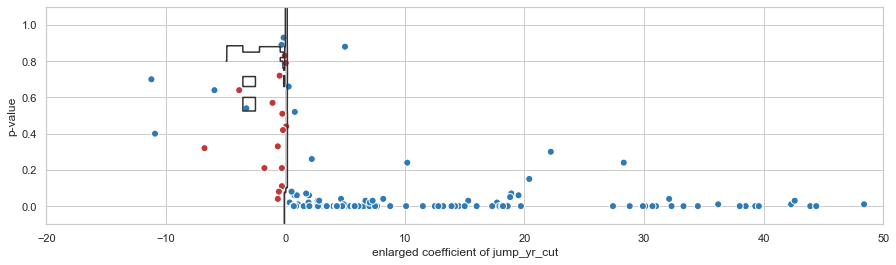

In [161]:
# pay attention to the dataframe here. which to use?

data = np.array([outcome,
                 round(table_rdd0[table_rdd0.image.isin(img_list)].beta_,2).tolist(),
#                  round(table_rdd0[table_rdd0.image.isin(img_list)].rsquared,2).tolist(),
                 round(table_rdd0[table_rdd0.image.isin(img_list)].pval,2).tolist(),
                ]).T
data_selected = data[data[:,0] != -1]
y = data_selected[:,0]
x = data_selected[:,1:]#.reshape(-1,1)
lr = RandomForestClassifier().fit(x, y)
print('score: ',str(lr.score(x,y)))
#print('coef: ',str(lr.coef_),'  intercept: ',str(lr.intercept_))
print('confusion matrix:')
print(metrics.confusion_matrix(y, lr.predict(x)))
fpr, tpr, thresholds = metrics.roc_curve(y, lr.predict(x))
print('auc: ',str(metrics.auc(fpr, tpr)))
print('R-squared: ',str(metrics.r2_score(y, lr.predict(x))))

xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = lr.predict_proba(grid)[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(15, 4))
ax.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=.6)
ax.scatter(x[:,0], x[:, 1], c=y, s=50, cmap="RdBu", vmin=-.2, vmax=1.2, edgecolor="white", linewidth=1)
ax.set(xlim=(-20, 50), ylim=(-.1, 1.1), xlabel="enlarged coefficient of jump_yr_cut", ylabel="p-value")
plt.show()

In [194]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [880]:
# pay attention to the dataframe here. which to use?

data = np.array([outcome,
                 round(table_rdd[table_poi.image.isin(img_list)].beta,2).tolist(),
#                  round(table_rdd[table_poi.image.isin(img_list)].pval,2).tolist(),
                ]).T
data_selected = data[data[:,0] != -1]
y = data_selected[:,0]
x = data_selected[:,1:]#.reshape(-1,1)
lr = LogisticRegression().fit(x, y)
print('accuracy: ',str(lr.score(x,y)))
print('coef: ',str(lr.coef_),'  intercept: ',str(lr.intercept_))

accuracy:  0.8470588235294118
coef:  [[0.]]   intercept:  [1.63913253]


In [868]:
lr.predict(x)
print('confusion matrix:')
print(metrics.confusion_matrix(y, lr.predict(x)))
fpr, tpr, thresholds = metrics.roc_curve(y, lr.predict(x))
print('auc: ',str(metrics.auc(fpr, tpr)))
print('R-squared: ',str(metrics.r2_score(y, lr.predict(x))))

confusion matrix:
[[  0  26]
 [  0 144]]
auc:  0.5
R-squared:  -0.1805555555555558


In [869]:
# to compute adjusted-r-square directly from documentation
print(lr.score(x, y), 1 - (1-lr.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1))
# 0.877643371323 0.863248473832 

0.8470588235294118 0.8461484593837535


In [874]:
yhat = lr.predict(x)
SS_Residual = sum((y-yhat)**2)       
SS_Total = sum((y-np.mean(y))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1)
print(r_squared, adjusted_r_squared)

-0.18055555555555425 -0.18758267195767053


In [875]:
SS_Residual

26.0

In [876]:
SS_Total

22.02352941176473

### use long window poisson regression

- score:  0.6923076923076923
- coef:  [[-0.02497943]]   
- intercept:  [0.81129262]

lr.predict_proba(x)

array([[0.31285344, 0.68714656],
       [0.31662467, 0.68337533],
       [0.31060248, 0.68939752],
       [0.3093736 , 0.6906264 ],
       [0.31873633, 0.68126367],
       [0.30836046, 0.69163954], ... ..., [0.3086269 , 0.6913731 ],
       [0.3085736 , 0.6914264 ],
       [0.31081648, 0.68918352],
       [0.31646254, 0.68353746]])

In [321]:
table_poi[(table_poi.start < 1994)&(table_poi.end > 2001)]

,group,endpoint,beta,pval,zscore,start,end,image
445,Blood & immune mechanism,D3_ACQCOAFACDEF,0.062768,7.851647e-01,0.272595,1987,2011,Blood & immune mechanism-D3_ACQCOAFACDEF.png
447,Blood & immune mechanism,D3_ACQHAEMOLYTICANAEMIANAS,1.485275,3.205335e-61,16.508155,1986,2011,Blood & immune mechanism-D3_ACQHAEMOLYTICANAEM...
448,Blood & immune mechanism,D3_ACQPUREREDCLLAPLASIA,0.980322,4.219482e-24,10.126388,1986,2011,Blood & immune mechanism-D3_ACQPUREREDCLLAPLAS...
449,Blood & immune mechanism,D3_ACUTEPOSTBLEEDANAEMIA,0.375927,1.278902e-19,9.062162,1986,2011,Blood & immune mechanism-D3_ACUTEPOSTBLEEDANAE...
451,Blood & immune mechanism,D3_AGRANULOCYTOSIS,1.205203,1.492326e-133,24.593234,1986,2011,Blood & immune mechanism-D3_AGRANULOCYTOSIS.png
...,...,...,...,...,...,...,...,...
2133,NaN,VD_SO,0.224784,8.415409e-03,2.634932,1987,2011,NaN
2134,NaN,VD_U,0.152514,9.683294e-05,3.898394,1989,2011,NaN
2135,NaN,VIRALPNEUMOKNOWN,0.387125,1.452722e-15,7.980898,1986,2011,NaN
2136,NaN,VIRALPNEUMONAS,0.642583,1.070239e-88,19.966835,1986,2011,NaN


In [322]:
a = table_poi[(table_poi.start < 1994)&(table_poi.end > 2001)].endpoint.tolist()
import json
with open('dis_list.json', 'w') as f:
    json.dump(a, f)

In [301]:
img_arr = np.array([outcome,img_list]).T
img_selected = img_arr[(img_arr[:,0] != '-1')].T[1,:]

In [435]:
resize_len, resize_wid = 200,200
def loadData(img_name_list=img_selected, img_dir='plots1'):
    X = np.asarray(Image.open(os.path.join(img_dir, img_selected[0])).resize((resize_len,resize_wid)))[:,:,0]
    X = X.reshape(1,X.shape[0]*X.shape[1])
    for i in tqdm.tqdm(range(len(img_name_list))):
        image = Image.open(os.path.join(img_dir, img_name_list[i]))
        img_mat = np.asarray(image.resize((resize_len,resize_wid)))[:,:,0]
        img_mat = img_mat.reshape(1,img_mat.shape[0]*img_mat.shape[1])

        X = np.vstack((X, img_mat))
    return X[1:,:]

In [395]:
X = loadData(img_dir='plots2')

100%|██████████| 130/130 [00:02<00:00, 63.45it/s]


In [344]:
# Split into train and dev
def splitData(X, y, split_index=0):
    if split_index == 0:
        split_index = int(9 * len(X) / 10)

    X_train, X_dev = X[:split_index], X[split_index:]        # 9/10 train set -> n = 117
    y_train, y_dev = y[:split_index], y[split_index:]        # 1/10 dev set -> n = 13

    permutation = np.array([i for i in range(len(X_train))]) # an array of nums from 0 to 117
    np.random.shuffle(permutation)                           # shuffle so as to reorder the data points
    X_train = [X_train[i] for i in permutation]
    y_train = [y_train[i] for i in permutation]
    
    return X_train, y_train, X_dev, y_dev

In [345]:
X_train, y_train, X_dev, y_dev = splitData(X, y, 100)

In [347]:
def batchifyData(X, y, batch_size):
    """
    Takes a set of data points and labels and groups them into batches.
    
    paras: X - a list of inputs; 
           y - a list of outputs; 
           batch_size - String - how many data points in each batch
    
    return: a list of dict 
            [{'x': tensor(mat1,...,matn), 'y': tensor(num1,...,numn)}, ...]
    """
    # Only take batch_size chunks. The remainder will be dropped.
    N = int(len(X) / batch_size) * batch_size # how many batches we have
    batches = []
    for i in range(0, N, batch_size):
        batches.append({
            'x': torch.tensor(X[i:i+batch_size], dtype=torch.float32),
            'y': torch.tensor(y[i:i+batch_size], dtype=torch.long
        )})
    return batches

In [544]:
def trainModel(train_data, dev_data, model, lr=0.01,momentum=0.9, nesterov=False, n_epochs=30):
    # original paras: train_data, dev_data, model, is_overlap, lr=0.01, momentum=0.9, nesterov=False, n_epochs=30
    """
    Train a model for N epochs given data and hyper-params.
    
    return: a list of dictionary with [{'Train Loss','Validation Loss'},{'Train Accuracy','Validation Accuracy'}]
    """
    # optimize: SGD, Adam
#     if opti == 'sdg':
#         optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9, nesterov=True)
#     elif opti == 'adadelta':
#         optimizer = torch.optim.Adadelta(model.parameters(), lr=1.0, rho=0.9, eps=1e-06, weight_decay=0)

#     optimizer = torch.optim.Adadelta(model.parameters(), lr=1.0, rho=0.9, eps=1e-06, weight_decay=0)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)
#     optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9, nesterov=False)

#     optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=momentum, nesterov=nesterov)
    train_losses, train_accuracies, val_losses, val_accuracies = [],[],[],[]
    
    for epoch in tqdm.tqdm(range(1, n_epochs+1)):
        print("-------------\nEpoch {}:\n".format(epoch))

        # Run **training***
        train_loss, train_acc, train_errors, train_res = runEpoch(train_data, model.train(), optimizer)
        # Run **validation**
        val_loss, val_acc, val_errors, val_res = runEpoch(dev_data, model.eval(), optimizer)
        
        print('Train loss: {:.6f} | Train accuracy: {:.6f}'.format(train_loss, train_acc))
        print('Val loss:   {:.6f} | Val accuracy:   {:.6f}'.format(val_loss, val_acc))
        
        train_losses.append(train_loss)
        train_accuracies.append(train_acc)
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)
        
        # Save model
        torch.save(model, 'mnist_model_fully_connected.pt')
        
    return [{'Train loss':train_losses,'Validation loss':val_losses},
            {'Train accuracy':train_accuracies,'Validation accuracy':val_accuracies}]

In [549]:
def runEpoch(data, model, optimizer):
    """Train model for one pass of train data, and return loss, acccuracy"""
    # Gather losses
    losses = []
    batch_accuracies = []
    x_err, y_err, pred_err = [],[],[]
    y_true, y_pred = [], []

    # If model is in train mode, use optimizer.
    is_training = model.training

    # Iterate through batches
    for batch in data:
        # Grab x and y
        x, y = batch['x'], batch['y']
#         print(x.shape)
        
        # Get output predictions
        out = model(x)

        # Predict and store accuracy
        predictions = torch.argmax(out, dim=1)
        
        y_true += y.tolist()
        y_pred += predictions.tolist()

        bool_arr = (predictions == y)

        # collect data with wrong predicted label
        ## need to convert pytorch tensor to list so as to append
        x_err += x[~bool_arr].tolist()
        y_err += y[~bool_arr].tolist()
        pred_err += predictions[~bool_arr].tolist()
        ## need to convert pytorch tensor to numpy array so as to apply np funcs
        accuracy = np.mean(bool_arr.numpy())
        batch_accuracies.append(accuracy)

        # Compute loss
        loss = F.cross_entropy(out, y)
        losses.append(loss.data.item())

        # If training, do an update.
        if is_training:
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    # Calculate epoch level scores
    avg_loss = np.mean(losses)
    avg_accuracy = np.mean(batch_accuracies)
    errors = (x_err, y_err, pred_err)
        
    return avg_loss, avg_accuracy, errors, (y_true, y_pred)

In [505]:
X_train_dev_ = np.reshape(X_train_dev, (X_train_dev.shape[0], 1, 200, 200))
train_batches = batchifyData(X_train_dev_, y, batch_size)

In [510]:
cnn(train_batches[0]['x'])

tensor([[ 2.0803,  0.9355],
        [ 1.3928, -0.0386],
        [ 0.2075,  2.0953],
        [ 2.8147,  1.6981],
        [-1.2203,  1.5956],
        [ 0.8885,  1.2550],
        [ 0.3815,  1.6917],
        [ 2.1080,  0.1797],
        [ 2.2038,  1.7409],
        [-0.2688, -0.3446]], grad_fn=<AddmmBackward>)

In [353]:
class Flatten(nn.Module):
    """A custom layer that views an input as 1D."""
    def forward(self, input):
        return input.view(input.size(0), -1)

In [529]:
def processData(algo):
    '''
    return: a list of dictionary with [{'Train Loss','Validation Loss'},{'Train Accuracy','Validation Accuracy'}]
            a float - test loss
            a float - test accuracy
            a tuple - 3 lists - test x errors, test y errors, test pred errors
    '''
    if algo == 'FFNN':  # each image is a flattened vector
        X_train_dev_ = X_train_dev
        X_test__ = X_test_
    elif algo == 'CNN':  # need to rehape the data back into a 1x200x200 image
        X_train_dev_ = np.reshape(X_train_dev, (X_train_dev.shape[0], 1, 200, 200))
        X_test__ = np.reshape(X_test_, (X_test_.shape[0], 1, 200, 200))
    
    # Split into train and dev
    X_train, y_train, X_dev, y_dev = splitData(X_train_dev_,y_train_dev)
    
    # Split dataset into batches
#     train_batches = batchifyData(X_train, y_train, batch_size)
    train_batches = batchifyData(X_train_dev_, y, batch_size)

    dev_batches = batchifyData(X_dev, y_dev, batch_size)
    test_batches = batchifyData(X_test__, y_test_, batch_size)
    
    # train model
    train_dev_loss_acc = trainModel(train_batches, dev_batches, model, lr=lr, momentum=momentum, nesterov=nesterov, n_epochs=n_epochs)
    
    # Evaluate the model on test data
    test_loss, test_acc, test_errors = runEpoch(test_batches, model.eval(), None)
    print()
    print("Loss on test set:"  + str(test_loss) + " Accuracy on test set: " + str(test_acc))
    return train_dev_loss_acc, test_loss, test_acc, test_errors

In [480]:
# Model specification
batch_size = 10 #128

## Hidden Layer Representation Size
unit_size = 10  #128

In [402]:
## FFNN Model
ffnn = nn.Sequential(
    nn.Linear(resize_len*resize_wid, unit_size),
    nn.LeakyReLU(),
    nn.Linear(unit_size, 2)
)

In [501]:
## CNN Model
cnn = nn.Sequential(          #  1  200  200
    nn.Conv2d(1, 32, (21, 21)), # 32  180  180
    nn.ReLU(),
    nn.MaxPool2d((2, 2)),     # 32  90  90
    nn.Conv2d(32, 64, (11,11)), # 64  80  80
    nn.ReLU(),
    nn.MaxPool2d((2,2)),      # 64   40   40
    nn.Conv2d(64, 128, (11,11)), # 128  30  30
    nn.ReLU(),
    nn.MaxPool2d((2,2)),      # 128   15   15
    nn.Conv2d(128, 256, (6,6)), # 256  10  10
    nn.ReLU(),
    nn.MaxPool2d((2,2)),      # 256   5   5
    Flatten(),                # 6400   1
    nn.Linear(6400,unit_size),# 6400   10
    nn.Dropout(),
    nn.Linear(unit_size,2)   # 10     2
)


In [415]:
256*5*5

6400

In [413]:
[i for i in range(1,21)]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

In [530]:
model = ffnn        
# model = cnn
lr = 0.1
momentum = 0.9
nesterov = False
n_epochs = 20

In [455]:
test_size = 30

img_test = random.sample(table.image.tolist(),test_size)
X_test = loadData(img_name_list=img_test, img_dir='plots2')

100%|██████████| 30/30 [00:00<00:00, 67.35it/s]


In [453]:
X_test.shape

(30, 40000)

100%|██████████| 30/30 [00:00<00:00, 46.37it/s]


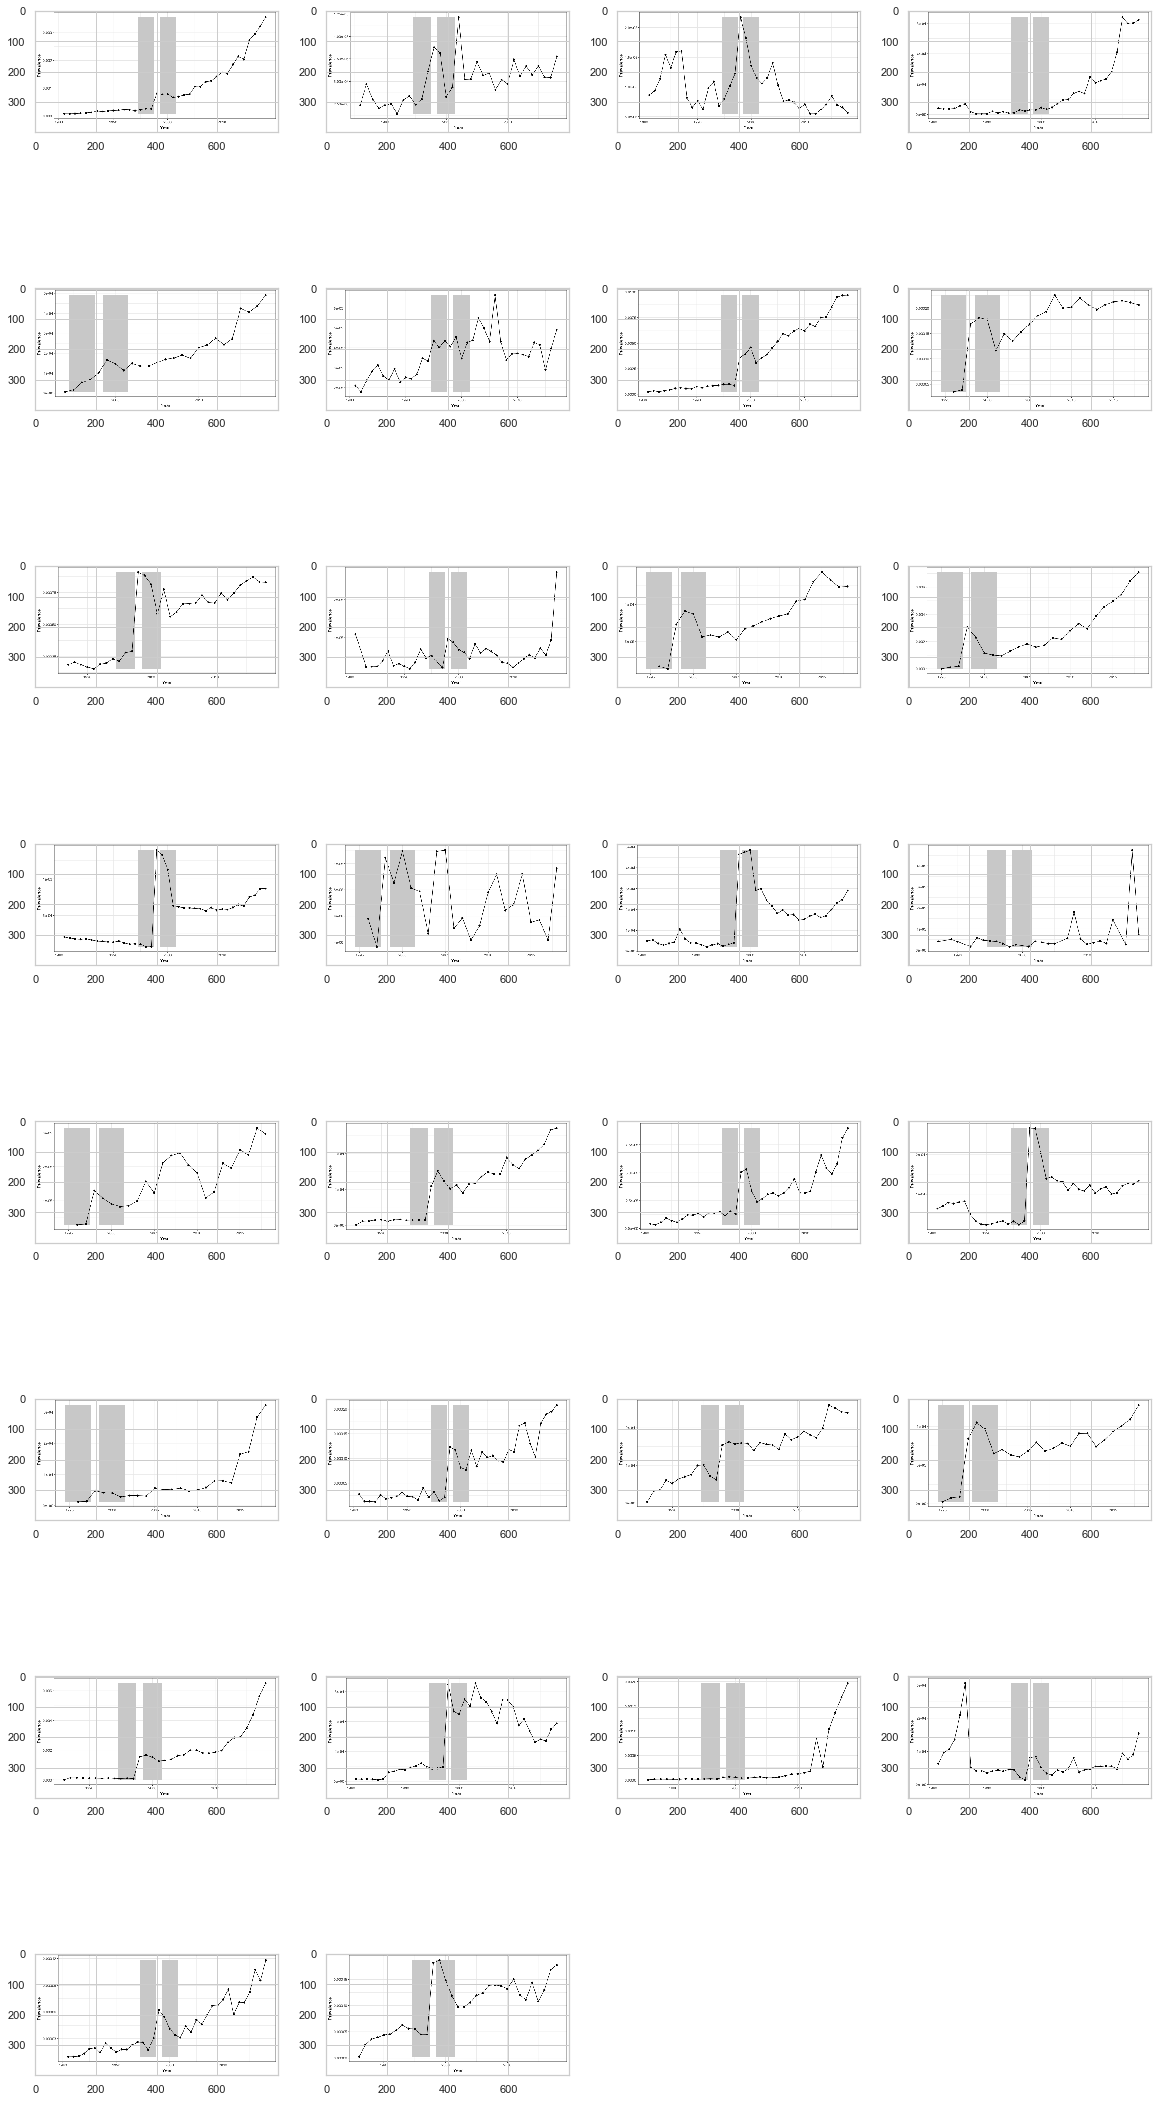

In [456]:
getPlots(0, len(img_test), n_col=4, img_name_list=img_test, img_dir='plots2')

In [460]:
y_test = [1,-1,-1,0,1,0,1,-1,1,0,-1,-1,1,-1,1,0,-1,1,1,1,-1,1,1,-1,1,1,0,0,1,1]

In [461]:
len(y_test)

30

In [462]:
mask = np.array([False if i == -1 else True for i in y_test])
len(mask[mask == True])

21

In [463]:
X_test_ = X_test[mask]
y_test_ = np.array(y_test)[mask]
img_test_ = np.array(img_test)[mask]

In [465]:
y_test_

array([1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1])

100%|██████████| 21/21 [00:00<00:00, 31.31it/s]


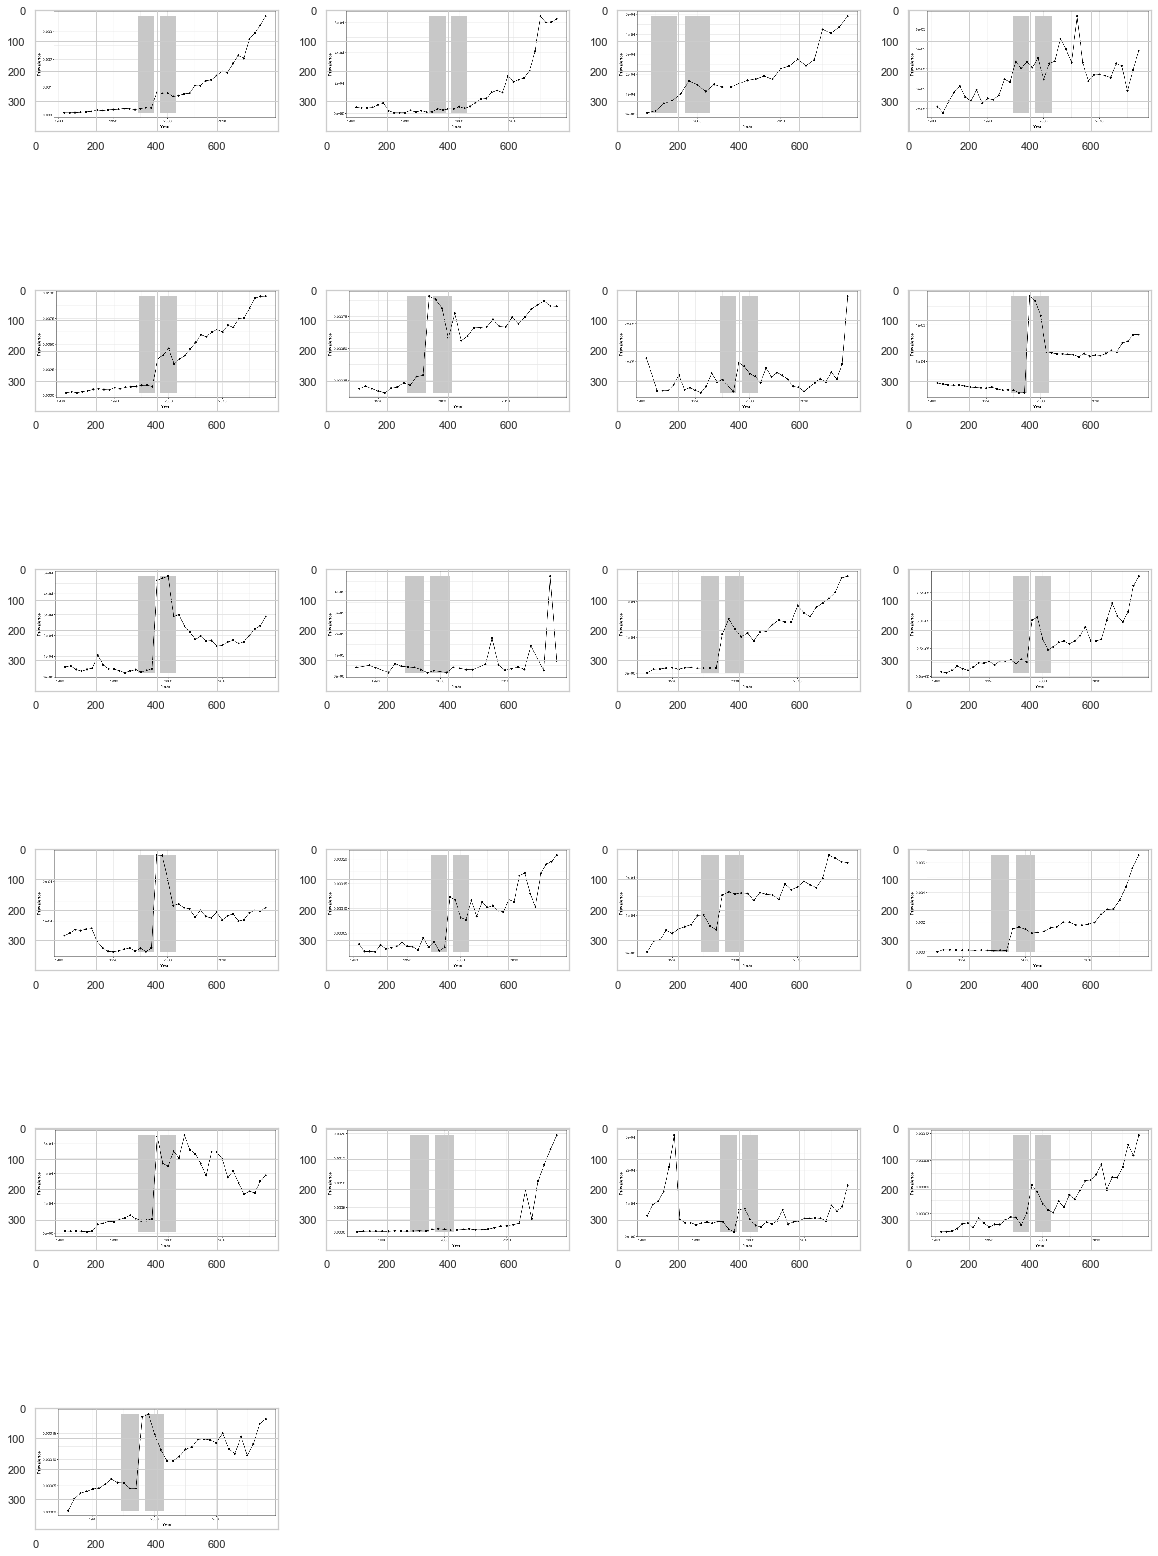

In [565]:
getPlots(0, len(img_test_), n_col=4, img_name_list=img_test_, img_dir='plots2')

In [397]:
X_train_dev, y_train_dev = X, y

In [524]:
def plotRes(train_dev_loss_acc, title_size):
    list_len = len(train_dev_loss_acc)
    fig, axs = plt.subplots(1, list_len, figsize=(20,5))
    for i in range(list_len):
        title = []
        for key, values in train_dev_loss_acc[i].items():
            axs[i].plot(values, marker='o', markersize=5, label=key)
            title.append(key)
        axs[i].set_title(' vs '.join(title), fontsize=title_size)
        axs[i].set_xlabel('n epochs',fontsize=12)
        axs[i].legend(fontsize=15)

In [531]:
train_dev_loss_acc, test_loss, test_acc, test_errors = processData('FFNN')

  0%|          | 0/20 [00:00<?, ?it/s]

-------------
Epoch 1:



  5%|▌         | 1/20 [00:00<00:07,  2.45it/s]

Train loss: 98241.911846 | Train accuracy: 0.630769
Val loss:   55197.593750 | Val accuracy:   0.300000
-------------
Epoch 2:



 10%|█         | 2/20 [00:00<00:06,  2.88it/s]

Train loss: 70315.027231 | Train accuracy: 0.538462
Val loss:   23054.027344 | Val accuracy:   0.700000
-------------
Epoch 3:

Train loss: 52455.684084 | Train accuracy: 0.569231
Val loss:   21984.105469 | Val accuracy:   0.300000


 15%|█▌        | 3/20 [00:00<00:05,  3.29it/s]

-------------
Epoch 4:

Train loss: 15611.703350 | Train accuracy: 0.507692
Val loss:   9662.754883 | Val accuracy:   0.700000


 25%|██▌       | 5/20 [00:01<00:03,  4.11it/s]

-------------
Epoch 5:

Train loss: 9149.643883 | Train accuracy: 0.646154
Val loss:   7125.382812 | Val accuracy:   0.700000
-------------
Epoch 6:



 35%|███▌      | 7/20 [00:01<00:02,  4.89it/s]

Train loss: 5260.785992 | Train accuracy: 0.584615
Val loss:   14807.643555 | Val accuracy:   0.700000
-------------
Epoch 7:

Train loss: 6538.238197 | Train accuracy: 0.638462
Val loss:   3533.064941 | Val accuracy:   0.300000
-------------
Epoch 8:



 45%|████▌     | 9/20 [00:01<00:02,  5.29it/s]

Train loss: 6453.461482 | Train accuracy: 0.592308
Val loss:   4852.336914 | Val accuracy:   0.700000
-------------
Epoch 9:

Train loss: 1512.751979 | Train accuracy: 0.707692
Val loss:   486.430664 | Val accuracy:   0.700000
-------------
Epoch 10:



 55%|█████▌    | 11/20 [00:02<00:01,  5.80it/s]

Train loss: 895.249273 | Train accuracy: 0.738462
Val loss:   839.032410 | Val accuracy:   0.800000
-------------
Epoch 11:

Train loss: 1753.003742 | Train accuracy: 0.661538
Val loss:   4082.397949 | Val accuracy:   0.700000
-------------
Epoch 12:



 65%|██████▌   | 13/20 [00:02<00:01,  6.21it/s]

Train loss: 1079.899682 | Train accuracy: 0.738462
Val loss:   2479.244385 | Val accuracy:   0.700000
-------------
Epoch 13:

Train loss: 1482.974471 | Train accuracy: 0.684615
Val loss:   364.390442 | Val accuracy:   0.700000
-------------
Epoch 14:



 75%|███████▌  | 15/20 [00:02<00:00,  6.92it/s]

Train loss: 869.770392 | Train accuracy: 0.807692
Val loss:   497.030670 | Val accuracy:   0.900000
-------------
Epoch 15:

Train loss: 1057.562648 | Train accuracy: 0.707692
Val loss:   284.094727 | Val accuracy:   0.900000
-------------
Epoch 16:



 85%|████████▌ | 17/20 [00:02<00:00,  7.62it/s]

Train loss: 1046.859110 | Train accuracy: 0.707692
Val loss:   409.913086 | Val accuracy:   0.900000
-------------
Epoch 17:

Train loss: 285.679821 | Train accuracy: 0.876923
Val loss:   417.897858 | Val accuracy:   0.900000
-------------
Epoch 18:

Train loss: 234.889137 | Train accuracy: 0.869231
Val loss:   241.340820 | Val accuracy:   0.900000


100%|██████████| 20/20 [00:03<00:00,  6.09it/s]

-------------
Epoch 19:

Train loss: 243.305606 | Train accuracy: 0.884615
Val loss:   221.853912 | Val accuracy:   0.800000
-------------
Epoch 20:

Train loss: 806.197952 | Train accuracy: 0.784615
Val loss:   348.668152 | Val accuracy:   0.900000

Loss on test set:1064.5906677246094 Accuracy on test set: 0.75


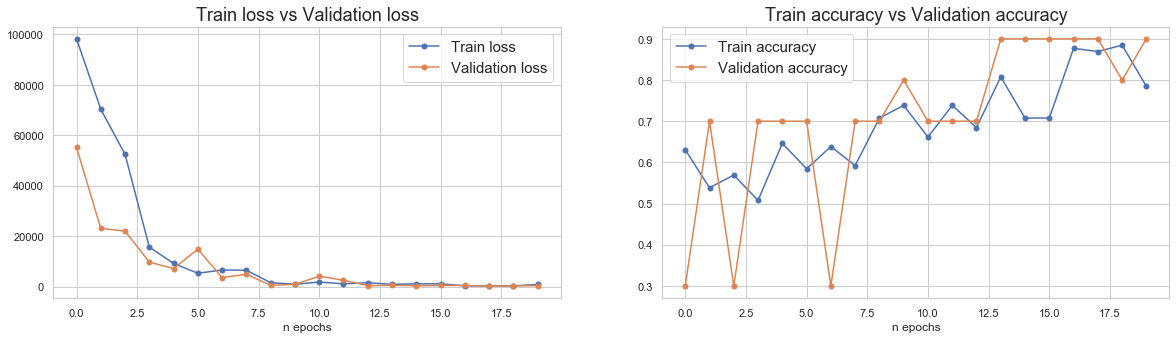

In [532]:
# res = [{'Train loss':train_dev_loss_acc[0]['Train loss']}, {'Train accuracy':train_dev_loss_acc[1]['Train accuracy']}]
plotRes(train_dev_loss_acc,18) 

In [533]:
print('True labels:              '+str(np.array(test_errors[1])))
print('Wrongly Predicted labels: '+str(np.array(test_errors[2])))
print('Wrong labels in total:    '+str(len(test_errors[2])))

True labels:              [0 0 0 0 0]
Wrongly Predicted labels: [1 1 1 1 1]
Wrong labels in total:    5


In [550]:
model = ffnn
X_train_dev_ = X_train_dev
X_test__ = X_test_

# Split into train and dev
X_train, y_train, X_dev, y_dev = splitData(X_train_dev_,y_train_dev)
    
# Split dataset into batches
train_batches = batchifyData(X_train_dev_, y, batch_size)

dev_batches = batchifyData(X_dev, y_dev, batch_size)
test_batches = batchifyData(X_test__, y_test_, batch_size)

# train model
train_dev_loss_acc = trainModel(train_batches, dev_batches, model, lr=lr, momentum=momentum, nesterov=nesterov, n_epochs=n_epochs)

# Evaluate the model on test data
test_loss, test_acc, test_errors, test_res = runEpoch(test_batches, model.eval(), None)

  0%|          | 0/20 [00:00<?, ?it/s]

-------------
Epoch 1:



  5%|▌         | 1/20 [00:00<00:04,  4.50it/s]

Train loss: 68489.865610 | Train accuracy: 0.507692
Val loss:   310.374817 | Val accuracy:   0.800000
-------------
Epoch 2:



 15%|█▌        | 3/20 [00:00<00:03,  4.95it/s]

Train loss: 32756.881858 | Train accuracy: 0.684615
Val loss:   549.610229 | Val accuracy:   0.900000
-------------
Epoch 3:

Train loss: 4261.266735 | Train accuracy: 0.653846
Val loss:   775.749756 | Val accuracy:   0.900000
-------------
Epoch 4:



 25%|██▌       | 5/20 [00:00<00:02,  5.94it/s]

Train loss: 1276.288622 | Train accuracy: 0.769231
Val loss:   932.249023 | Val accuracy:   0.800000
-------------
Epoch 5:

Train loss: 1024.908751 | Train accuracy: 0.792308
Val loss:   3050.655762 | Val accuracy:   0.700000
-------------
Epoch 6:



 35%|███▌      | 7/20 [00:01<00:01,  6.72it/s]

Train loss: 1706.322796 | Train accuracy: 0.730769
Val loss:   81.169632 | Val accuracy:   0.900000
-------------
Epoch 7:

Train loss: 1155.740990 | Train accuracy: 0.815385
Val loss:   6260.092773 | Val accuracy:   0.700000
-------------
Epoch 8:



 45%|████▌     | 9/20 [00:01<00:01,  6.85it/s]

Train loss: 4162.702332 | Train accuracy: 0.700000
Val loss:   7394.481445 | Val accuracy:   0.700000
-------------
Epoch 9:

Train loss: 1708.997856 | Train accuracy: 0.815385
Val loss:   140.142181 | Val accuracy:   0.900000
-------------
Epoch 10:



 55%|█████▌    | 11/20 [00:01<00:01,  7.78it/s]

Train loss: 770.911148 | Train accuracy: 0.807692
Val loss:   2518.824951 | Val accuracy:   0.700000
-------------
Epoch 11:

Train loss: 942.261057 | Train accuracy: 0.823077
Val loss:   944.028625 | Val accuracy:   0.800000
-------------
Epoch 12:



 65%|██████▌   | 13/20 [00:01<00:01,  6.86it/s]

Train loss: 22429.855972 | Train accuracy: 0.653846
Val loss:   17080.953125 | Val accuracy:   0.700000
-------------
Epoch 13:

Train loss: 6375.046800 | Train accuracy: 0.646154
Val loss:   7839.857910 | Val accuracy:   0.700000
-------------
Epoch 14:



 70%|███████   | 14/20 [00:02<00:00,  6.08it/s]

Train loss: 8021.235431 | Train accuracy: 0.653846
Val loss:   5839.841309 | Val accuracy:   0.300000
-------------
Epoch 15:



 75%|███████▌  | 15/20 [00:02<00:00,  5.52it/s]

Train loss: 6387.103271 | Train accuracy: 0.600000
Val loss:   82893.375000 | Val accuracy:   0.300000
-------------
Epoch 16:



 80%|████████  | 16/20 [00:02<00:00,  5.33it/s]

Train loss: 24435.019719 | Train accuracy: 0.553846
Val loss:   47098.824219 | Val accuracy:   0.700000
-------------
Epoch 17:

Train loss: 25528.149038 | Train accuracy: 0.630769
Val loss:   22552.361328 | Val accuracy:   0.300000


 85%|████████▌ | 17/20 [00:02<00:00,  5.14it/s]

-------------
Epoch 18:

Train loss: 13084.807063 | Train accuracy: 0.638462
Val loss:   7885.459961 | Val accuracy:   0.700000


 95%|█████████▌| 19/20 [00:03<00:00,  5.14it/s]

-------------
Epoch 19:

Train loss: 6311.380984 | Train accuracy: 0.653846
Val loss:   909.035156 | Val accuracy:   0.800000
-------------
Epoch 20:



100%|██████████| 20/20 [00:03<00:00,  5.98it/s]

Train loss: 445.367953 | Train accuracy: 0.907692
Val loss:   1539.432251 | Val accuracy:   0.900000


In [551]:
test_res

([1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [554]:
metrics.confusion_matrix(test_res[0], test_res[1])

array([[ 1,  5],
       [ 0, 14]])

In [557]:
fpr, tpr, thresholds = metrics.roc_curve(test_res[0], test_res[1])
metrics.auc(fpr, tpr)

0.5833333333333333

100%|██████████| 20/20 [00:00<00:00, 22.96it/s]


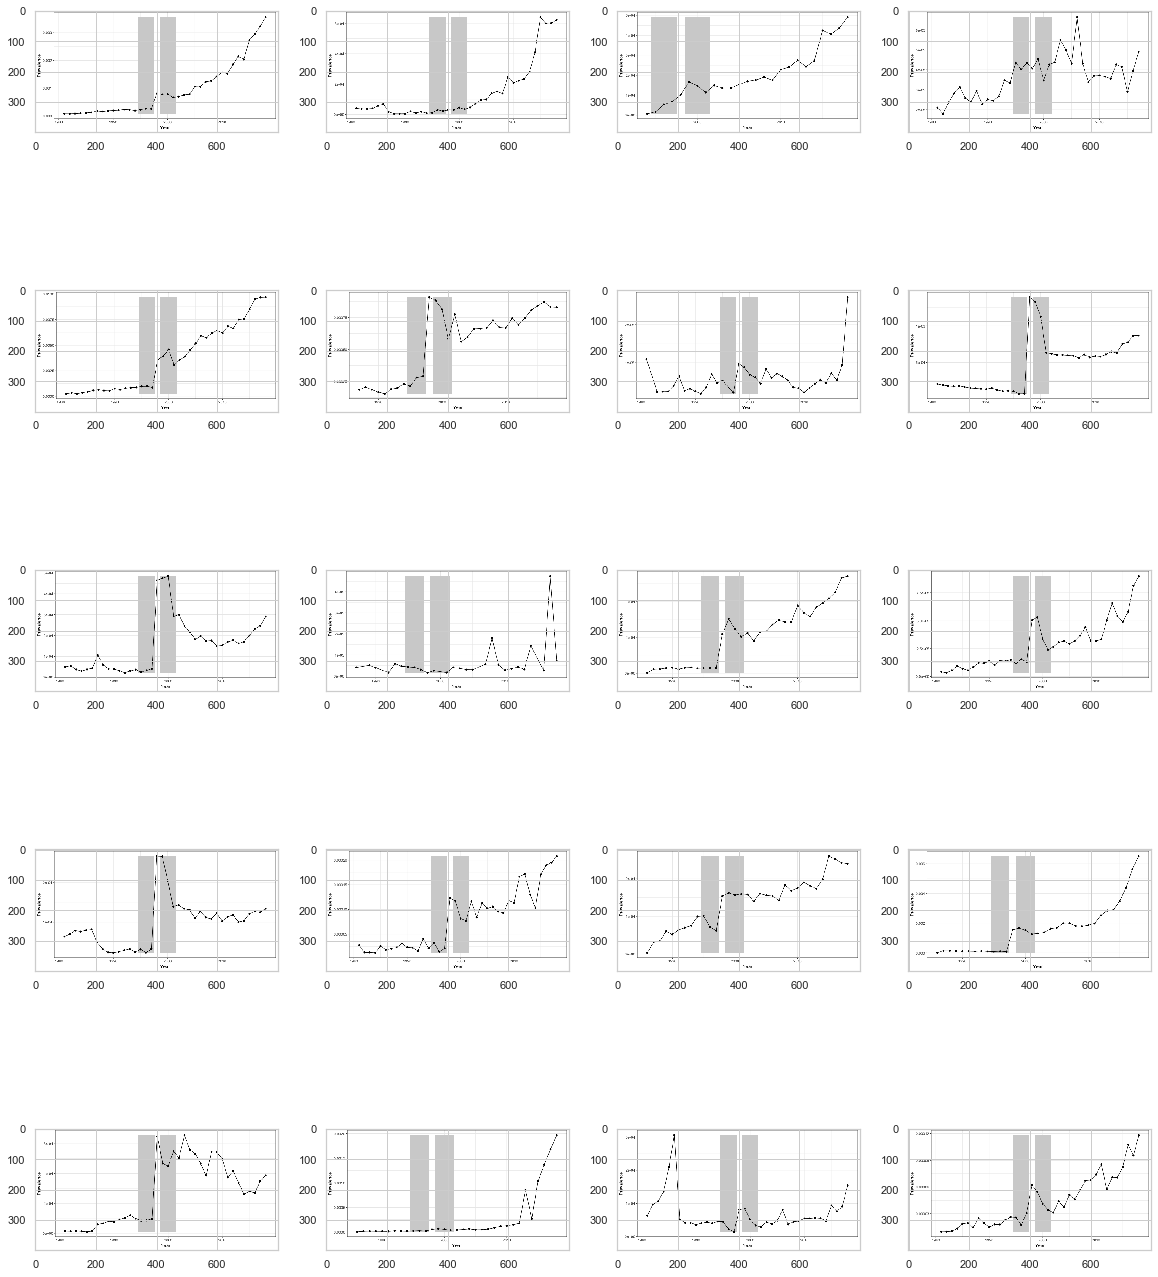

In [558]:
getPlots(0, len(img_test_), n_col=4, img_name_list=img_test_[:-1], img_dir='plots2')

In [519]:
train_dev_loss_acc1, test_loss1, test_acc1, test_errors1 = processData('CNN')

  0%|          | 0/20 [00:00<?, ?it/s]

-------------
Epoch 1:



  5%|▌         | 1/20 [00:34<11:02, 34.86s/it]

Train loss: 0.696883 | Train accuracy: 0.600000
Val loss:   0.618520 | Val accuracy:   0.700000
-------------
Epoch 2:



 10%|█         | 2/20 [01:11<10:38, 35.45s/it]

Train loss: 0.688713 | Train accuracy: 0.669231
Val loss:   0.634403 | Val accuracy:   0.700000
-------------
Epoch 3:



 15%|█▌        | 3/20 [01:46<09:57, 35.14s/it]

Train loss: 0.641613 | Train accuracy: 0.707692
Val loss:   0.610864 | Val accuracy:   0.700000
-------------
Epoch 4:



 20%|██        | 4/20 [02:20<09:16, 34.80s/it]

Train loss: 0.628765 | Train accuracy: 0.692308
Val loss:   0.611518 | Val accuracy:   0.700000
-------------
Epoch 5:



 25%|██▌       | 5/20 [02:54<08:38, 34.58s/it]

Train loss: 0.626735 | Train accuracy: 0.692308
Val loss:   0.611757 | Val accuracy:   0.700000
-------------
Epoch 6:



 30%|███       | 6/20 [03:28<08:01, 34.39s/it]

Train loss: 0.619285 | Train accuracy: 0.692308
Val loss:   0.612079 | Val accuracy:   0.700000
-------------
Epoch 7:



 35%|███▌      | 7/20 [04:02<07:25, 34.27s/it]

Train loss: 0.631010 | Train accuracy: 0.692308
Val loss:   0.612098 | Val accuracy:   0.700000
-------------
Epoch 8:



 40%|████      | 8/20 [04:38<06:57, 34.78s/it]

Train loss: 0.624909 | Train accuracy: 0.692308
Val loss:   0.613913 | Val accuracy:   0.700000
-------------
Epoch 9:



 45%|████▌     | 9/20 [05:12<06:19, 34.54s/it]

Train loss: 0.621218 | Train accuracy: 0.692308
Val loss:   0.611184 | Val accuracy:   0.700000
-------------
Epoch 10:



 50%|█████     | 10/20 [05:46<05:44, 34.45s/it]

Train loss: 0.620610 | Train accuracy: 0.692308
Val loss:   0.611620 | Val accuracy:   0.700000
-------------
Epoch 11:



 55%|█████▌    | 11/20 [06:20<05:09, 34.37s/it]

Train loss: 0.621136 | Train accuracy: 0.692308
Val loss:   0.612088 | Val accuracy:   0.700000
-------------
Epoch 12:



 60%|██████    | 12/20 [06:54<04:33, 34.25s/it]

Train loss: 0.622879 | Train accuracy: 0.692308
Val loss:   0.611458 | Val accuracy:   0.700000
-------------
Epoch 13:



 65%|██████▌   | 13/20 [07:28<03:59, 34.17s/it]

Train loss: 0.623060 | Train accuracy: 0.692308
Val loss:   0.611170 | Val accuracy:   0.700000
-------------
Epoch 14:



 70%|███████   | 14/20 [08:02<03:24, 34.11s/it]

Train loss: 0.620083 | Train accuracy: 0.692308
Val loss:   0.612559 | Val accuracy:   0.700000
-------------
Epoch 15:



 75%|███████▌  | 15/20 [08:36<02:50, 34.17s/it]

Train loss: 0.619778 | Train accuracy: 0.692308
Val loss:   0.611162 | Val accuracy:   0.700000
-------------
Epoch 16:



 80%|████████  | 16/20 [09:11<02:16, 34.22s/it]

Train loss: 0.623210 | Train accuracy: 0.692308
Val loss:   0.611234 | Val accuracy:   0.700000
-------------
Epoch 17:



 85%|████████▌ | 17/20 [09:45<01:42, 34.14s/it]

Train loss: 0.621162 | Train accuracy: 0.692308
Val loss:   0.611737 | Val accuracy:   0.700000
-------------
Epoch 18:



 90%|█████████ | 18/20 [10:19<01:08, 34.23s/it]

Train loss: 0.620619 | Train accuracy: 0.692308
Val loss:   0.611527 | Val accuracy:   0.700000
-------------
Epoch 19:



 95%|█████████▌| 19/20 [10:53<00:34, 34.15s/it]

Train loss: 0.620890 | Train accuracy: 0.692308
Val loss:   0.611451 | Val accuracy:   0.700000
-------------
Epoch 20:



100%|██████████| 20/20 [11:27<00:00, 34.36s/it]

Train loss: 0.620739 | Train accuracy: 0.692308
Val loss:   0.611408 | Val accuracy:   0.700000



Loss on test set:0.6114078760147095 Accuracy on test set: 0.7


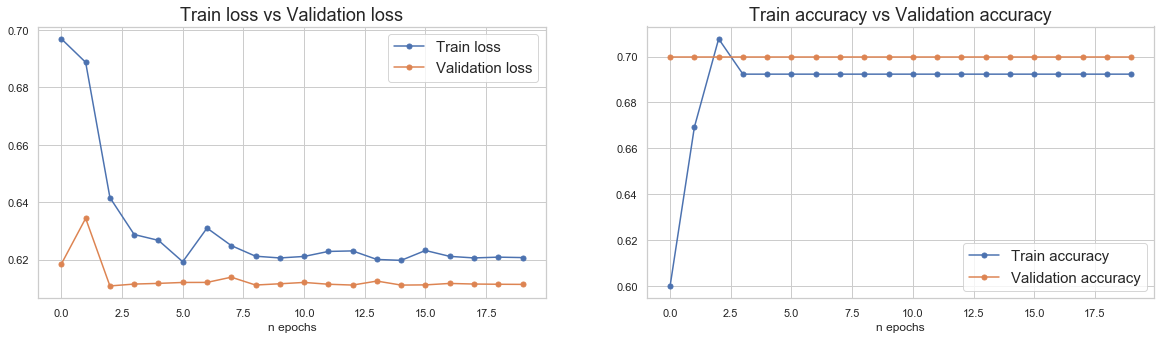

In [525]:
# res = [{'Train loss':train_dev_loss_acc[0]['Train loss']}, {'Train accuracy':train_dev_loss_acc[1]['Train accuracy']}]
plotRes(train_dev_loss_acc,18) 

In [521]:
test_loss

0.6114078760147095

In [522]:
print('True labels:              '+str(np.array(test_errors[1])[:10]))
print('Wrongly Predicted labels: '+str(np.array(test_errors[2])[:10]))
print('Wrong labels in total:    '+str(len(test_errors[2])))

True labels:              [0 0 0 0 0 0]
Wrongly Predicted labels: [1 1 1 1 1 1]
Wrong labels in total:    6


In [576]:
# a = table[(table.beta < 0.5)&(table.beta > 0)].beta.tolist()[:60]
# np.array(a).reshape(-1,4)
a[a['Neoplasm Subgroups'] == 'CD2'].endpoint image
getSamples(df,sample_size=200)

array([[0.39883534, 0.40277442, 0.45541475, 0.32975392],
       [0.04138699, 0.3426487 , 0.04554887, 0.4018064 ],
       [0.18373027, 0.36884777, 0.02970724, 0.19019341],
       [0.15682544, 0.06464328, 0.44161402, 0.33329037],
       [0.23895125, 0.38233912, 0.36552801, 0.12585801],
       [0.13834798, 0.2215791 , 0.39547516, 0.37990009],
       [0.18685595, 0.47778444, 0.22556265, 0.48330469],
       [0.24173681, 0.46989821, 0.40389419, 0.39523845],
       [0.25916709, 0.07820804, 0.47706576, 0.06363823],
       [0.4824614 , 0.27962229, 0.36943377, 0.39042089],
       [0.2727964 , 0.35873939, 0.18174574, 0.20706545],
       [0.07816581, 0.0223893 , 0.39678407, 0.44963446],
       [0.16239448, 0.4472139 , 0.4165783 , 0.39659686],
       [0.34095299, 0.03138179, 0.01598203, 0.39422531],
       [0.24275751, 0.1841342 , 0.29765526, 0.44941582]])

In [500]:
test1 = a[a['Neoplasm Subgroups'] == 'C3']
test2 = table_poi0[table_poi0.group == 'Skin & subcutaneous tissue']

In [541]:
table_poi0[table_poi0.group == 'Pregnancy, childbirth & puerperium'].endpoint.tolist()

['GEST_DIABETES',
 'O15_ABORT_FAILED',
 'O15_ABORT_MEDICAL',
 'O15_ABORT_OTHER',
 'O15_ABORT_SPONTAN',
 'O15_ABORT_UNS',
 'O15_AMNIOT_OTHER',
 'O15_ANTENAT_ABNORM',
 'O15_ANTEPART_HAEM_NAS',
 'O15_BIRTH_BREAT_INFECT',
 'O15_BREAST_LACT_OTHER_DIS',
 'O15_COMPLIC_ABORT_ECTOP_MOLAR',
 'O15_CONCEPT_ABNORM',
 'O15_DELIV_MULTIP',
 'O15_DELIV_PERIN_LACER',
 'O15_DELIV_SPONT',
 'O15_ECLAMPSIA',
 'O15_EXCESS_VOMIT_PREG',
 'O15_EXIST_HYPERT_COMPLIC',
 'O15_FAILED_INDUCT',
 'O15_FALSE_LAB',
 'O15_GESTAT_HYPERT',
 'O15_GESTAT_OEDEM_PREINUR',
 'O15_HAEMORRH_EARLY_PREG',
 'O15_LABOUR_ABNORM_FORCES',
 'O15_LABOUR_ANEST_COMPLIC',
 'O15_LABOUR_INTRAPART_HAEMORRH',
 'O15_LABOUR_LONG',
 'O15_LABOUR_MALPOS',
 'O15_LABOUR_OBSTR_OTHER',
 'O15_LABOUR_OTHER',
 'O15_LABOUR_PELVIC_ABNORM',
 'O15_LABOUR_UMBILICAL',
 'O15_MATERN_HYPERT_UNS',
 'O15_MATERN_INFECT_ELSEWHERE',
 'O15_MEMBR_PREMAT_RUPT',
 'O15_MULTIP_GEST',
 'O15_MULTIP_GEST_COMPLIC',
 'O15_OBSTET_EMBOL',
 'O15_OBSTET_TRAUMA_OTHER',
 'O15_PLAC_DISORD',

100%|██████████| 60/60 [00:04<00:00, 13.91it/s]


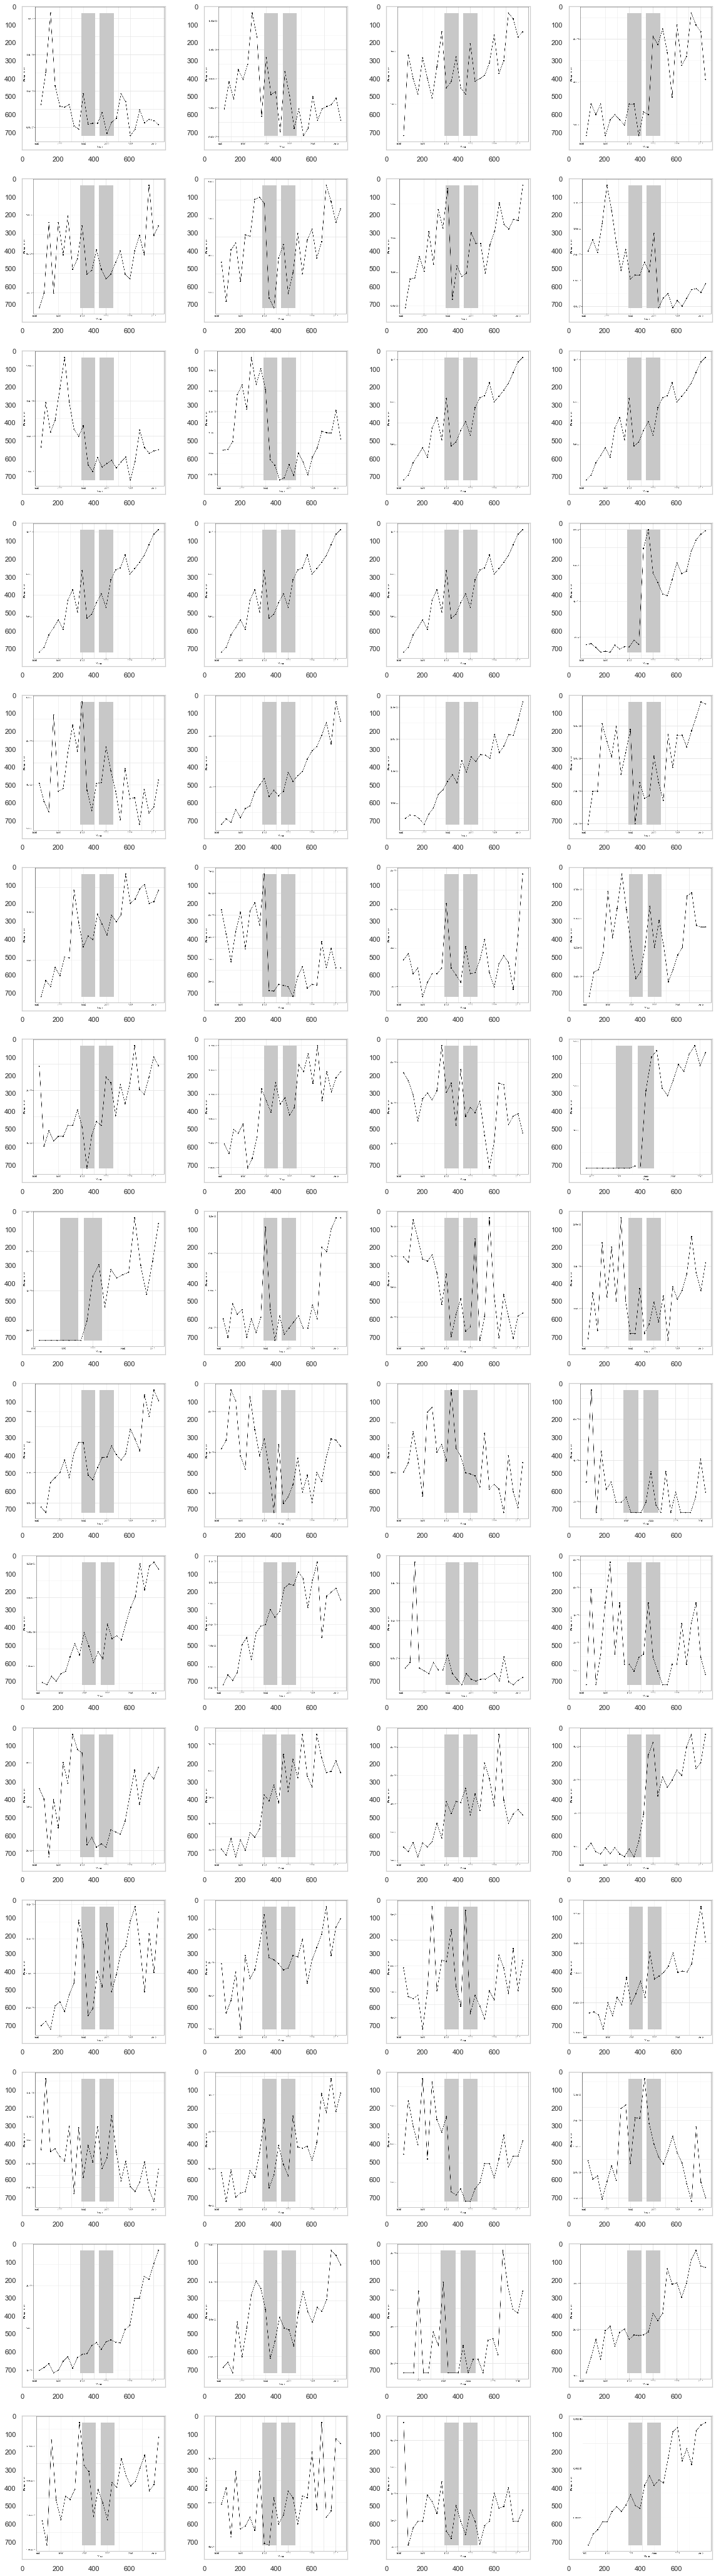

In [540]:
getPlots(0, 60, n_col=4, img_name_list=test1.image.tolist(), img_dir='plots')